## 📘  Exploratory Data Analysis (EDA) — Introduction

This notebook presents a comprehensive Exploratory Data Analysis (EDA) of the **NSW electricity market** with the objective of supporting spot price forecasting and market risk understanding.

### 💡 Core Objectives

The analysis focuses on identifying:


* **Structural patterns** in spot prices
* Key **demand and renewable drivers**
* **Time-of-day and seasonal risk regimes** 
* The role of **rooftop PV, intermittent generation, and net demand shaping**
* Conditions under which **price volatility and extreme events** occur

### 🎯 EDA Philosophy

Rather than exhaustive visual exploration, this EDA is **decision-oriented** — designed to inform:

* **Feature selection** for forecasting models
* **Risk-aware interpretation** of price behaviour
* **Practical insights** for energy market participants

### ➡️ Phase Alignment

The EDA outcomes directly feed into:

1.  **Phase 3: Forecasting Models**
2.  The development of a **Power BI decision-support dashboard**

---

### **Table of Contents**

1.  Data Loading and Preprocessing
2.  **Spot Price Analysis** (Distribution, Trends, Volatility)
3.  **Key Drivers Analysis** (Demand, Temperature, Intermittent Generation)
4.  **Net Demand Shaping** and PV Impact
5.  **Risk Regime Analysis** (Time-of-Day and Seasonal Patterns)
6.  Summary of Insights for Forecasting and Risk

## 🗓️ EDA Project Structure: Phases and Sections

This table outlines the structured approach taken for the Exploratory Data Analysis (EDA) and subsequent forecasting phases, ensuring a logical progression from data preparation to final model deployment and business insights.

| Section | Phase | Description |
| :--- | :--- | :--- |
| **Phase 1: Data Preparation & Audit** | | |
| 1 | Phase 1.1 | **Final Combined Dataset Construction:** Merging AEMO price data, demand, weather data, and solar/wind generation into a single, time-aligned dataframe. |
| 2 | Phase 1.2 | **Data Validation & Quality Checks:** Handling missing values, identifying and correcting extreme outliers, ensuring data types are correct, and checking temporal integrity. |
| 3 | Phase 1.3 | **Feature Audit & Final Feature Freeze:** Reviewing all potential independent variables, calculating time-based features (e.g., month, hour-of-day), and selecting the final set for EDA. |
| **Phase 2: Exploratory Data Analysis (EDA)** | | |
| 4 | Phase 2.1 | **Spot Price Behaviour Analysis:** Statistical description of price (skewness, kurtosis) and time-series properties (ACF, stationarity). |
| 5 | Phase 2.2 | **Demand vs Price Relationships:** Analyzing how total demand and price correlate, focusing on demand spikes and scarcity periods.  |
| 6 | Phase 2.3 | **Renewables Impact on Prices:** Investigating the effect of non-dispatchable generation on spot prices, particularly during daylight hours. |
| 6.1 | 2.3.1 | **Rooftop PV Impact:** Assessing the correlation between residential solar output and the 'duck curve' phenomenon, especially in midday hours.  |
| 6.2 | 2.3.2 | **Intermittent Generation Behaviour:** Analyzing the combined contribution and volatility of utility-scale wind and solar farms. |
| 6.3 | 2.3.3 | **Net Demand Shaping:** Analysis of how **Net Demand** (Total Demand - Intermittent Generation) affects price, focusing on the evening ramp. |
| 7 | Phase 2.4 | **Weather Impact Analysis:** Detailed examination of temperature (max/min/lagged) and cloud cover correlation with demand and price outcomes. |
| 8 | Phase 2.5 | **Ramp & Volatility Analysis:** Focused study of rapid price and demand changes (ramps), critical for short-term risk management. |
| 8.1 | 2.5.1 | **Ramp Distributions:** Distribution of 30-minute price-to-price changes ($\Delta P$). |
| 8.2 | 2.5.2 | **Ramp vs Price Volatility:** Correlating extreme ramp events with system security or outage conditions. |


## PHASE 1.1 — Data Extraction, Integration & Storage


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Fix: Use a valid matplotlib style instead of "seaborn"
# Common valid styles include 'seaborn-v0_8', 'ggplot', 'fivethirtyeight', etc.
# Or you can check available styles with plt.style.available
plt.style.use("seaborn-v0_8")  # Updated to use a valid style name

# Alternative approach: Instead of using plt.style.use, you could also
# set the seaborn style directly with:
# sns.set_style("darkgrid")  # or "whitegrid", "dark", "white", "ticks"

df = pd.read_csv("data/processed/modelling_dataset.csv", parse_dates=["timestamp"])

df.head(), df.shape

(            timestamp        RRP  TOTALDEMAND  DEMAND_AND_NONSCHEDGEN  \
 0 2025-01-01 00:05:00  138.02790      7251.07              7376.44276   
 1 2025-01-01 00:10:00  134.41651      7297.85              7423.26277   
 2 2025-01-01 00:15:00  135.89000      7274.39              7392.27277   
 3 2025-01-01 00:20:00  120.30552      7173.05              7285.67277   
 4 2025-01-01 00:25:00  119.88874      7140.49              7251.77685   
 
    AVAILABLEGENERATION  NETINTERCHANGE  TOTALINTERMITTENTGENERATION  \
 0          12034.75116          355.87                     92.33276   
 1          12019.46909          307.06                     91.19277   
 2          12012.23745          323.45                     91.32277   
 3          12011.59961          423.75                     91.03277   
 4          12017.73580          462.43                     89.80685   
 
    pv_rooftop_mw  temperature  wind_speed  irradiance  hour  dayofweek  month  \
 0            NaN         27.3        

## PHASE 1.2 — Data Validation & Quality Checks

In [2]:
# -----------------------------
# PHASE 1.2 — Data Validation
# 1) Basic snapshot of dataset
# -----------------------------

print("Rows, Columns:", df.shape)
display(df.head(3))
display(df.tail(3))

# Quick data types check
df.info()


Rows, Columns: (87552, 15)


,timestamp,RRP,TOTALDEMAND,DEMAND_AND_NONSCHEDGEN,AVAILABLEGENERATION,NETINTERCHANGE,TOTALINTERMITTENTGENERATION,pv_rooftop_mw,temperature,wind_speed,irradiance,hour,dayofweek,month,net_demand_after_pv
0,2025-01-01 00:05:00,138.02790,7251.07,7376.44276,12034.75116,355.87,92.33276,NaN,27.3,13.0,NaN,0,2,1,NaN
1,2025-01-01 00:10:00,134.41651,7297.85,7423.26277,12019.46909,307.06,91.19277,NaN,27.3,13.0,NaN,0,2,1,NaN
2,2025-01-01 00:15:00,135.89000,7274.39,7392.27277,12012.23745,323.45,91.32277,NaN,27.3,13.0,NaN,0,2,1,NaN


,timestamp,RRP,TOTALDEMAND,DEMAND_AND_NONSCHEDGEN,AVAILABLEGENERATION,NETINTERCHANGE,TOTALINTERMITTENTGENERATION,pv_rooftop_mw,temperature,wind_speed,irradiance,hour,dayofweek,month,net_demand_after_pv
87549,2025-10-31 23:50:00,105.78006,6890.66,7047.57378,10945.64985,-84.27,136.95378,0.0,20.0,9.0,NaN,23,4,10,6890.66
87550,2025-10-31 23:55:00,108.89000,6890.17,7045.02638,10962.67769,-80.38,133.12638,0.0,20.0,9.0,NaN,23,4,10,6890.17
87551,2025-11-01 00:00:00,108.89015,6894.16,7051.75930,10928.04257,-139.11,139.96930,0.0,20.0,15.0,NaN,0,5,11,6894.16


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87552 entries, 0 to 87551
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   timestamp                    87552 non-null  datetime64[ns]
 1   RRP                          87552 non-null  float64       
 2   TOTALDEMAND                  87552 non-null  float64       
 3   DEMAND_AND_NONSCHEDGEN       87552 non-null  float64       
 4   AVAILABLEGENERATION          87552 non-null  float64       
 5   NETINTERCHANGE               87552 non-null  float64       
 6   TOTALINTERMITTENTGENERATION  87552 non-null  float64       
 7   pv_rooftop_mw                87547 non-null  float64       
 8   temperature                  87552 non-null  float64       
 9   wind_speed                   87552 non-null  float64       
 10  irradiance                   0 non-null      float64       
 11  hour                         87552 non-nu

### Time Coverage & Frequency Check

In [3]:
# ---------------------------------------
# 2) Time coverage and expected frequency
# ---------------------------------------

df = df.sort_values("timestamp").reset_index(drop=True)

start_ts = df["timestamp"].min()
end_ts   = df["timestamp"].max()

print("Start timestamp:", start_ts)
print("End timestamp  :", end_ts)
print("Total days covered:", (end_ts - start_ts).days)

# Check if timestamps are unique
n_unique_ts = df["timestamp"].nunique()
print("Unique timestamps:", n_unique_ts)
print("Duplicate timestamp rows:", len(df) - n_unique_ts)

# Infer the most common time delta between rows
deltas = df["timestamp"].diff().dropna()
print("Most common time delta:", deltas.mode().iloc[0])
print("Top 5 deltas:\n", deltas.value_counts().head(5))


Start timestamp: 2025-01-01 00:05:00
End timestamp  : 2025-11-01 00:00:00
Total days covered: 303
Unique timestamps: 87552
Duplicate timestamp rows: 0
Most common time delta: 0 days 00:05:00
Top 5 deltas:
 timestamp
0 days 00:05:00    87551
Name: count, dtype: int64


### Missing Timestamps / Gaps Detection

In [5]:
# ---------------------------------------
# 3) Detect missing timestamps (gaps)
# ---------------------------------------
# If your data is 5-minute, expected freq is "5min"
# If hourly, expected freq is "H"
# Update expected_freq accordingly.

expected_freq = "5min"   # change to "H" if hourly

# Build full expected timeline
full_index = pd.date_range(df["timestamp"].min(), df["timestamp"].max(), freq=expected_freq)

# Compare against actual timestamps
missing_ts = full_index.difference(df["timestamp"])

print("Expected rows if continuous:", len(full_index))
print("Actual rows:", len(df))
print("Missing timestamps count:", len(missing_ts))

# Show first few missing timestamps (if any)
if len(missing_ts) > 0:
    print("First 20 missing timestamps:")
    print(missing_ts[:20])


Expected rows if continuous: 87552
Actual rows: 87552
Missing timestamps count: 0


### Column-wise Missing Values

In [6]:
# ---------------------------------------
# 4) Missing values per column
# ---------------------------------------

missing_counts = df.isna().sum().sort_values(ascending=False)
missing_pct = (missing_counts / len(df) * 100).round(2)

missing_summary = pd.DataFrame({
    "missing_count": missing_counts,
    "missing_percent": missing_pct
})

display(missing_summary[missing_summary["missing_count"] > 0])


,missing_count,missing_percent
irradiance,87552,100.00
pv_rooftop_mw,5,0.01
net_demand_after_pv,5,0.01


### Identify Rows with Missing Values (Which rows + which columns)

In [7]:
# ----------------------------------------------------
# 5) Find which rows contain missing values and where
# ----------------------------------------------------

# Rows that have at least 1 missing value
rows_with_nan = df[df.isna().any(axis=1)]

print("Rows with any missing values:", len(rows_with_nan))
display(rows_with_nan.head(10))

# For a cleaner view: show which columns are missing in each row
nan_map = rows_with_nan.isna()
missing_cols_per_row = nan_map.apply(lambda r: list(r[r].index), axis=1)

rows_nan_report = rows_with_nan[["timestamp"]].copy()
rows_nan_report["missing_columns"] = missing_cols_per_row.values

display(rows_nan_report.head(20))


Rows with any missing values: 87552


,timestamp,RRP,TOTALDEMAND,DEMAND_AND_NONSCHEDGEN,AVAILABLEGENERATION,NETINTERCHANGE,TOTALINTERMITTENTGENERATION,pv_rooftop_mw,temperature,wind_speed,irradiance,hour,dayofweek,month,net_demand_after_pv
0,2025-01-01 00:05:00,138.02790,7251.07,7376.44276,12034.75116,355.87,92.33276,NaN,27.3,13.0,NaN,0,2,1,NaN
1,2025-01-01 00:10:00,134.41651,7297.85,7423.26277,12019.46909,307.06,91.19277,NaN,27.3,13.0,NaN,0,2,1,NaN
2,2025-01-01 00:15:00,135.89000,7274.39,7392.27277,12012.23745,323.45,91.32277,NaN,27.3,13.0,NaN,0,2,1,NaN
3,2025-01-01 00:20:00,120.30552,7173.05,7285.67277,12011.59961,423.75,91.03277,NaN,27.3,13.0,NaN,0,2,1,NaN
4,2025-01-01 00:25:00,119.88874,7140.49,7251.77685,12017.73580,462.43,89.80685,NaN,27.3,13.0,NaN,0,2,1,NaN
5,2025-01-01 00:30:00,121.87000,7162.36,7270.41685,12015.13604,437.96,89.49685,0.0,27.3,13.0,NaN,0,2,1,7162.36
6,2025-01-01 00:35:00,111.65192,7078.85,7188.18685,12008.21123,514.49,89.09685,0.0,27.3,13.0,NaN,0,2,1,7078.85
7,2025-01-01 00:40:00,119.04851,7051.56,7156.90684,11981.58233,515.22,89.26684,0.0,27.3,13.0,NaN,0,2,1,7051.56
8,2025-01-01 00:45:00,119.49351,7029.33,7133.59685,11958.59248,514.63,89.38685,0.0,27.3,13.0,NaN,0,2,1,7029.33
9,2025-01-01 00:50:00,115.95158,6941.93,7046.34684,11951.19598,594.44,89.66684,0.0,27.3,13.0,NaN,0,2,1,6941.93


,timestamp,missing_columns
0,2025-01-01 00:05:00,"[pv_rooftop_mw, irradiance, net_demand_after_pv]"
1,2025-01-01 00:10:00,"[pv_rooftop_mw, irradiance, net_demand_after_pv]"
2,2025-01-01 00:15:00,"[pv_rooftop_mw, irradiance, net_demand_after_pv]"
3,2025-01-01 00:20:00,"[pv_rooftop_mw, irradiance, net_demand_after_pv]"
4,2025-01-01 00:25:00,"[pv_rooftop_mw, irradiance, net_demand_after_pv]"
5,2025-01-01 00:30:00,[irradiance]
6,2025-01-01 00:35:00,[irradiance]
7,2025-01-01 00:40:00,[irradiance]
8,2025-01-01 00:45:00,[irradiance]
9,2025-01-01 00:50:00,[irradiance]


### Duplicate Rows Check

In [8]:
# ---------------------------------------
# 6) Duplicate rows check (entire row)
# ---------------------------------------

dup_rows = df.duplicated().sum()
print("Fully duplicated rows:", dup_rows)

# Duplicate timestamps already checked earlier, but you can inspect them:
dup_ts = df[df.duplicated(subset=["timestamp"], keep=False)].sort_values("timestamp")

print("Duplicate timestamp rows:", len(dup_ts))
display(dup_ts.head(10))


Fully duplicated rows: 0
Duplicate timestamp rows: 0


,timestamp,RRP,TOTALDEMAND,DEMAND_AND_NONSCHEDGEN,AVAILABLEGENERATION,NETINTERCHANGE,TOTALINTERMITTENTGENERATION,pv_rooftop_mw,temperature,wind_speed,irradiance,hour,dayofweek,month,net_demand_after_pv


### Sanity Checks for Key Numeric Columns

In [10]:
# ---------------------------------------
# 7) Sanity checks for key columns
# ---------------------------------------
# Adjust column list to match your dataset columns exactly.

key_cols = [
    "RRP",
    "TOTALDEMAND",
    "net_demand_after_pv",
    "pv_rooftop_mw",
    "TOTALINTERMITTENTGENERATION",
    "temperature",
    "wind_speed"
]

# Keep only columns that exist (avoids errors if some are missing)
key_cols = [c for c in key_cols if c in df.columns]

# Summary stats
display(df[key_cols].describe().T)

# Simple sanity flags (customize thresholds based on your business logic)
sanity_flags = {}

if "RRP" in df.columns:
    sanity_flags["RRP_negative_count"] = (df["RRP"] < 0).sum()
    sanity_flags["RRP_extreme_high_count"] = (df["RRP"] > 5000).sum()  # threshold for spikes

if "TOTALDEMAND" in df.columns:
    sanity_flags["TOTALDEMAND_negative_count"] = (df["TOTALDEMAND"] < 0).sum()

if "pv_rooftop_mw" in df.columns:
    sanity_flags["PV_negative_count"] = (df["pv_rooftop_mw"] < 0).sum()

if "TOTALINTERMITTENTGENERATION" in df.columns:
    sanity_flags["Intermittent_negative_count"] = (df["TOTALINTERMITTENTGENERATION"] < 0).sum()

print("Sanity flags:")
for k, v in sanity_flags.items():
    print(f"{k}: {v}")


,count,mean,std,min,25%,50%,75%,max
RRP,87552.0,109.184412,484.231893,-999.99406,51.700380,81.93957,121.838998,20300.00000
TOTALDEMAND,87552.0,7624.261409,1551.164262,2532.25000,6616.137500,7493.87000,8488.095000,13159.46000
net_demand_after_pv,87547.0,5581.086632,3905.703982,-8339.66300,3621.004500,6850.82400,8044.532000,13158.65200
pv_rooftop_mw,87547.0,2043.197444,2891.618163,0.00000,0.000000,14.62500,3874.921000,11340.49800
TOTALINTERMITTENTGENERATION,87552.0,109.158174,53.951364,-1.85799,66.456762,96.74127,146.930868,275.13234
temperature,87552.0,18.559648,5.168678,6.00000,14.900000,18.80000,22.100000,40.70000
wind_speed,87552.0,20.255916,10.522491,0.00000,13.000000,18.40000,26.000000,72.40000


Sanity flags:
RRP_negative_count: 10683
RRP_extreme_high_count: 127
TOTALDEMAND_negative_count: 0
PV_negative_count: 0
Intermittent_negative_count: 1


### Create a Data Quality Summary (Single Table to Paste into Report)

In [11]:
# ---------------------------------------
# 9) Final Data Quality Summary Table
# ---------------------------------------

summary = {
    "rows": len(df),
    "columns": df.shape[1],
    "start_timestamp": df["timestamp"].min(),
    "end_timestamp": df["timestamp"].max(),
    "unique_timestamps": df["timestamp"].nunique(),
    "duplicate_timestamps": len(df) - df["timestamp"].nunique(),
    "missing_timestamps_count": len(missing_ts) if "missing_ts" in locals() else None,
    "rows_with_any_missing": df.isna().any(axis=1).sum(),
}

# Add key sanity counts if computed
summary.update(sanity_flags)

quality_summary = pd.DataFrame([summary]).T.rename(columns={0: "value"})
display(quality_summary)


,value
rows,87552
columns,15
start_timestamp,2025-01-01 00:05:00
end_timestamp,2025-11-01 00:00:00
unique_timestamps,87552
duplicate_timestamps,0
missing_timestamps_count,0
rows_with_any_missing,87552
RRP_negative_count,10683
RRP_extreme_high_count,127


## PHASE 1.2 — Data Validation & Quality Checks

### 1.2.1 Missing values summary

In [12]:
missing_summary[missing_summary["missing_count"] > 0]


,missing_count,missing_percent
irradiance,87552,100.00
pv_rooftop_mw,5,0.01
net_demand_after_pv,5,0.01


#### 1.2.1(a)Droping irradiance 

In [13]:
df = df.drop(columns=["irradiance"])

print("Dropped column: irradiance")
print("Remaining columns:", df.shape[1])

Dropped column: irradiance
Remaining columns: 14


### 1.2.1(b) Identify Rows with Missing PV / Net Demand

In [15]:
# ---------------------------------------------------
# Step 2: Locate rows with missing PV or net demand
# ---------------------------------------------------

cols_to_check = ["pv_rooftop_mw", "net_demand_after_pv"]

rows_with_small_missing = df[df[cols_to_check].isna().any(axis=1)]

print("Number of affected rows:", len(rows_with_small_missing))
display(rows_with_small_missing[["timestamp"] + cols_to_check])

Number of affected rows: 5


,timestamp,pv_rooftop_mw,net_demand_after_pv
0,2025-01-01 00:05:00,NaN,NaN
1,2025-01-01 00:10:00,NaN,NaN
2,2025-01-01 00:15:00,NaN,NaN
3,2025-01-01 00:20:00,NaN,NaN
4,2025-01-01 00:25:00,NaN,NaN


#### Dropping the  Rows

In [16]:
df = df.dropna(subset=cols_to_check)

print("Rows after cleanup:", df.shape[0])

Rows after cleanup: 87547


####  Justification for Dropping the missing values of the Roof_top_pv and Net_Demand_After_pv 

- A small number of rows (<0.05%) with missing PV and net demand values were removed to maintain data integrity. These rows occurred at boundary timestamps and not in generation of PV timelines which  did not materially impact analysis or forecasting.

#### Re-run Missing Values Check

In [18]:
df.isna().sum()

timestamp                      0
RRP                            0
TOTALDEMAND                    0
DEMAND_AND_NONSCHEDGEN         0
AVAILABLEGENERATION            0
NETINTERCHANGE                 0
TOTALINTERMITTENTGENERATION    0
pv_rooftop_mw                  0
temperature                    0
wind_speed                     0
hour                           0
dayofweek                      0
month                          0
net_demand_after_pv            0
dtype: int64

## PHASE 1.3 — Feature Audit & Final Feature Freeze

### 1.3.1 List All Current Columns

In [19]:
# ---------------------------------------
# PHASE 1.3 — Feature Audit
# Step 1: List all columns
# ---------------------------------------

print("Total columns:", len(df.columns))
display(pd.DataFrame({"column_name": df.columns}))


Total columns: 14


,column_name
0,timestamp
1,RRP
2,TOTALDEMAND
3,DEMAND_AND_NONSCHEDGEN
4,AVAILABLEGENERATION
5,NETINTERCHANGE
6,TOTALINTERMITTENTGENERATION
7,pv_rooftop_mw
8,temperature
9,wind_speed


### 1.3.2 —  Features by Role

#### Classifying  features by role into:

- Target

- Core drivers

- Derived features

- Time identifiers

- To be dropped

In [20]:
# ---------------------------------------
# Step 2: Manually classify features
# ---------------------------------------

feature_roles = {
    # Target
    "RRP": "target",

    # Core demand & supply drivers
    "TOTALDEMAND": "core_driver",
    "net_demand_after_pv": "core_driver",
    "pv_rooftop_mw": "core_driver",
    "TOTALINTERMITTENTGENERATION": "core_driver",

    # Weather drivers
    "temperature": "core_driver",
    "wind_speed": "core_driver",

    # Time identifiers
    "timestamp": "time_id",
    "hour": "time_id",
    "dayofweek": "time_id",
    "month": "time_id",

    # Derived dynamics
    "demand_ramp": "derived",
    "renewable_ramp": "derived",
    "net_demand_ramp": "derived"
}

feature_audit = pd.DataFrame({
    "feature": df.columns,
    "role": [feature_roles.get(c, "review") for c in df.columns]
})

display(feature_audit)


,feature,role
0,timestamp,time_id
1,RRP,target
2,TOTALDEMAND,core_driver
3,DEMAND_AND_NONSCHEDGEN,review
4,AVAILABLEGENERATION,review
5,NETINTERCHANGE,review
6,TOTALINTERMITTENTGENERATION,core_driver
7,pv_rooftop_mw,core_driver
8,temperature,core_driver
9,wind_speed,core_driver


### 1.3.3 Final Feature Set

In [22]:
# ---------------------------------------
# Step 4: Final frozen feature list
# ---------------------------------------

final_features = [
    "timestamp",
    "RRP",
    "TOTALDEMAND",
    "net_demand_after_pv",
    "pv_rooftop_mw",
    "TOTALINTERMITTENTGENERATION",
    "temperature",
    "wind_speed",
    "hour",
    "dayofweek",
    "month"
]

# Keep only frozen features
df_final = df[final_features].copy()

print("Final frozen dataset shape:", df_final.shape)
display(df_final.head())


Final frozen dataset shape: (87547, 11)


,timestamp,RRP,TOTALDEMAND,net_demand_after_pv,pv_rooftop_mw,TOTALINTERMITTENTGENERATION,temperature,wind_speed,hour,dayofweek,month
5,2025-01-01 00:30:00,121.87000,7162.36,7162.36,0.0,89.49685,27.3,13.0,0,2,1
6,2025-01-01 00:35:00,111.65192,7078.85,7078.85,0.0,89.09685,27.3,13.0,0,2,1
7,2025-01-01 00:40:00,119.04851,7051.56,7051.56,0.0,89.26684,27.3,13.0,0,2,1
8,2025-01-01 00:45:00,119.49351,7029.33,7029.33,0.0,89.38685,27.3,13.0,0,2,1
9,2025-01-01 00:50:00,115.95158,6941.93,6941.93,0.0,89.66684,27.3,13.0,0,2,1


## Phase 1.3 - Done -- Save the frozen dataset

In [23]:
df_final.to_csv("data/processed/final_spot_price_dataset.csv", index=False)
print("Saved → data/processed/final_spot_price_dataset.csv")


Saved → data/processed/final_spot_price_dataset.csv


In [24]:
# Ensure no missing values remain
df_final.isna().sum()


timestamp                      0
RRP                            0
TOTALDEMAND                    0
net_demand_after_pv            0
pv_rooftop_mw                  0
TOTALINTERMITTENTGENERATION    0
temperature                    0
wind_speed                     0
hour                           0
dayofweek                      0
month                          0
dtype: int64

## PHASE 2.1 — Price Behaviour EDA

In [26]:
# ---------------------------------------
# PHASE 2.1 — Price Behaviour EDA
# Target variable overview
# ---------------------------------------

price = df_final["RRP"]

print("RRP summary statistics:")
display(price.describe())

print("Negative price count:", (price < 0).sum())
print("Extreme price count (> $5,000):", (price > 5000).sum())


RRP summary statistics:


count    87547.000000
mean       109.183240
std        484.245692
min       -999.994060
25%         51.693570
50%         81.933300
75%        121.836580
max      20300.000000
Name: RRP, dtype: float64

Negative price count: 10683
Extreme price count (> $5,000): 127


### 2.1.2  Price Distribution (Histogram + KDE)

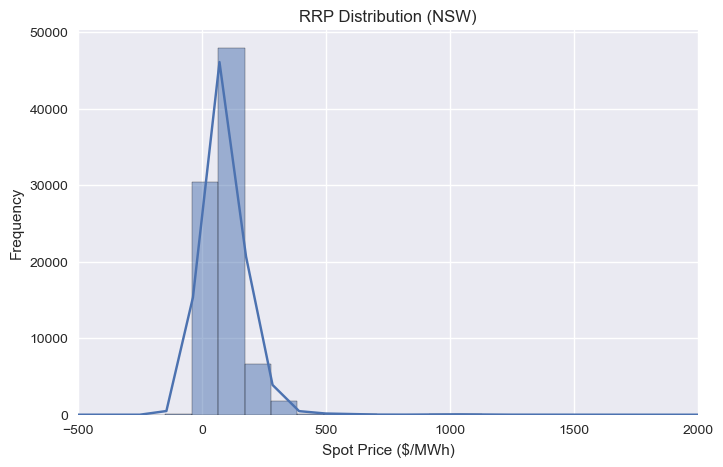

In [27]:
# ---------------------------------------
# RRP distribution
# ---------------------------------------

plt.figure(figsize=(8,5))
sns.histplot(price, bins=200, kde=True)
plt.title("RRP Distribution (NSW)")
plt.xlabel("Spot Price ($/MWh)")
plt.ylabel("Frequency")
plt.xlim(-500, 2000)  # zoom to meaningful range
plt.grid(True)
plt.show()


🔍 **Interpretation — RRP Distribution (NSW Spot Price)**

---

### 1. Key Insight
The NSW spot price distribution is **highly right-skewed with heavy tails**, indicating that while prices are usually concentrated at relatively low to moderate levels, **rare but extreme price spikes dominate risk and average outcomes**.

---

### 2. Statistical Observations
- The majority of prices are clustered in a **narrow band around low positive values**, close to zero to a few hundred $/MWh.
- **Negative prices** are clearly present, confirming periods of oversupply in the market.
- A **long right tail** extends to very high prices (hundreds to thousands of $/MWh), although these events occur infrequently.
- The KDE peak is sharp, suggesting **high frequency of “normal” price conditions**, contrasted with sparse extreme events.

---

### 3. Patterns Identified
- **Asymmetry**: Upside price risk is far larger than downside risk.
- **Fat tails**: Extreme prices are not outliers in a statistical sense but a structural feature of the NEM.
- **Bimodal tendency (implicit)**: Normal pricing regime vs stress/spike regime, even though the histogram visually shows a dominant central mass.

---

### 4. Impact on Forecasting / Market Behaviour
- Mean price is **not representative** of typical market conditions due to spike dominance.
- Models assuming normality (e.g. simple linear regression without transformations) will **underestimate risk**.
- Forecasting should consider:
  - Log or capped price transforms,
  - Quantile / probabilistic forecasts,
  - Separate modelling of **spike vs non-spike regimes**.

---

### 5. What to Explore Next
- Segment prices into **negative, normal, and spike regimes**.
- Analyse **when** spikes occur (hour-of-day, month, net demand conditions).
- Link extreme prices to **net demand after PV and renewable ramps**.
- Create price-risk indicators (spike flags, volatility bands) for Power BI dashboards.

---


### 2.1.3-log-Scale Price Distribution (Spikes Visibility)

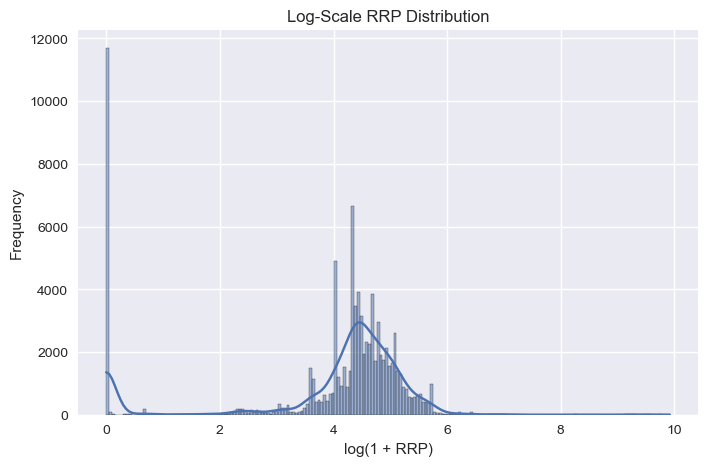

In [28]:
# ---------------------------------------
# Log-scale distribution for spikes
# ---------------------------------------

plt.figure(figsize=(8,5))
sns.histplot(np.log1p(price.clip(lower=0)), bins=200, kde=True)
plt.title("Log-Scale RRP Distribution")
plt.xlabel("log(1 + RRP)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()



🔍 **Interpretation — Log-Scale RRP Distribution (NSW Spot Price)**

---

### 1. Key Insight
Applying a log transformation to RRP reveals the **true underlying structure of price behaviour**, clearly separating **normal operating prices** from **extreme spike events** that were compressed in the linear-scale view.

---

### 2. Statistical Observations
- After log(1 + RRP), the bulk of prices form a **well-defined central distribution**, indicating a dominant “normal price regime”.
- The left-most spike near zero reflects **negative and near-zero prices**, which cluster tightly even after transformation.
- The right tail remains extended, confirming that **price spikes are rare but structurally persistent**, not random noise.

---

### 3. Patterns Identified
- **Multi-regime behaviour** becomes visible:
  - Near-zero / negative price regime,
  - Normal price regime (dense central mass),
  - Extreme spike regime (sparse right tail).
- The transformed distribution is **closer to symmetric** in the central region, making it more suitable for statistical modelling.
- Spike events still stand out clearly, even in log space, reinforcing their importance.

---

### 4. Impact on Forecasting / Market Behaviour
- Log-transformed prices are **far more model-friendly** for ML and regression-based forecasting.
- This transformation helps prevent:
  - Models being dominated by extreme spikes,
  - Underfitting of normal price dynamics.
- Enables hybrid approaches:
  - Continuous forecasting on log-prices,
  - Separate classification or threshold models for spike detection.

---

### 5. What to Explore Next
- Compare **log(RRP) vs net demand after PV** to test price sensitivity.
- Identify **hours/months where observations fall in the right tail** (spike-prone periods).
- Build **spike flags** using log thresholds for downstream forecasting and Power BI dashboards.
- Consider regime-based models (normal vs spike conditions).

---


### 2.1.4 - Price Time Series (Full Year)

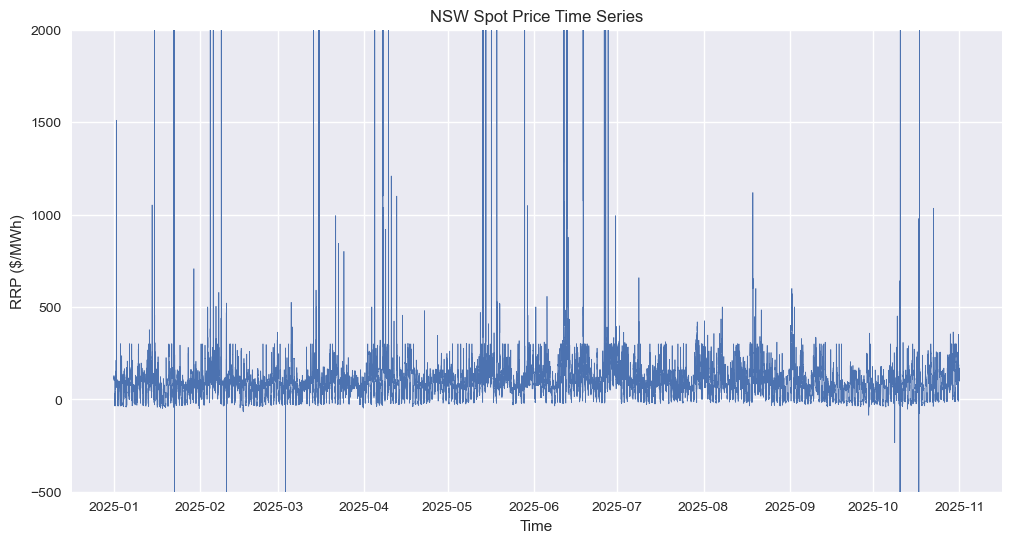

In [41]:
# ---------------------------------------
# RRP time series
# ---------------------------------------

plt.figure(figsize=(12,6))
plt.plot(df_final["timestamp"], price, linewidth=0.5)
plt.title("NSW Spot Price Time Series")
plt.xlabel("Time")
plt.ylabel("RRP ($/MWh)")
plt.ylim(-500, 2000)
plt.grid(True)
plt.show()


🔍 **Interpretation — NSW Spot Price Time Series (RRP)**

---

### 1. Key Insight
The NSW spot price time series is dominated by **frequent volatility with intermittent extreme price spikes**, indicating a market that operates under normal conditions most of the time but experiences **sudden stress events** driven by system constraints.

---

### 2. Statistical Observations
- The majority of RRP values remain within a **low-to-moderate price band**, clustered close to the baseline.
- Extreme upward spikes reaching **$1,000–$2,000/MWh** occur sporadically, while **negative price events** appear less frequently but persist across the year.
- Volatility is **heteroskedastic**—price variance increases during certain periods rather than remaining constant over time.

---

### 3. Patterns Identified
- **Spike clustering** is visible in specific time windows, suggesting that price shocks are not isolated but occur in bursts.
- No strong long-term upward or downward trend is evident, reinforcing that **short-term drivers dominate price formation**.
- Periods with dense spikes align with known stress drivers in the NEM such as:
  - High demand conditions,
  - Renewable intermittency,
  - Network or generation constraints.

---

### 4. Impact on Forecasting / Market Behaviour
- Simple time-series models assuming stable variance will **underperform** in this environment.
- Forecasting must account for:
  - Regime shifts (normal vs spike conditions),
  - Asymmetric risk (upward spikes more extreme than downward moves).
- This behaviour justifies:
  - Log-transformation of prices,
  - Separate spike-detection or classification layers alongside continuous forecasting.

---

### 5. What to Explore Next
- Identify **when spikes occur most often** (hour-of-day, weekday vs weekend, monthly seasonality).
- Link spike periods to **net demand after PV** and **renewable ramping**.
- Quantify spike frequency and duration to support **risk-aware forecasting and hedging strategies**.
- Compare this series against **log(RRP)** to formalise price regimes.

---


### 2.1.5 Rolling Volatility (Price Risk Indicator)

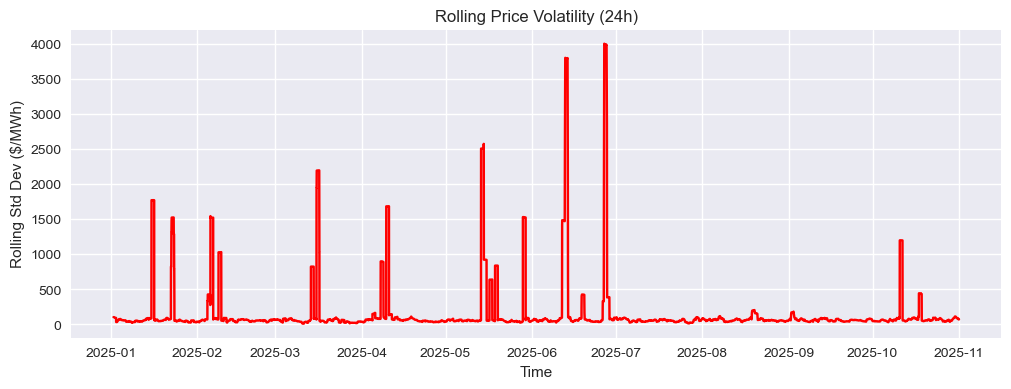

In [30]:
# ---------------------------------------
# Rolling volatility (24-hour window)
# ---------------------------------------

rolling_std = price.rolling(288).std()  # 288 = 24 hours for 5-min data

plt.figure(figsize=(12,4))
plt.plot(df_final["timestamp"], rolling_std, color="red")
plt.title("Rolling Price Volatility (24h)")
plt.xlabel("Time")
plt.ylabel("Rolling Std Dev ($/MWh)")
plt.grid(True)
plt.show()


🔍 Interpretation — Rolling Spot Price Volatility (24h Window, NSW)

1. Key Insight  
Rolling volatility in NSW spot prices is generally low for most of the year but punctuated by **sharp, extreme volatility spikes**, indicating short-lived but severe market stress events.

2. Statistical Observations  
- The baseline rolling standard deviation remains relatively stable at low levels for extended periods.  
- Volatility spikes reach **very high magnitudes (well above normal levels)**, often several times the baseline.  
- These spikes are clustered rather than evenly distributed, suggesting regime-based behaviour rather than random noise.

3. Patterns Identified  
- Volatility clustering is evident: once volatility increases, multiple spikes often occur within a short time window.  
- The most extreme volatility events are concentrated around specific periods (e.g., late autumn to early winter), aligning with known stress seasons in the NEM.  
- Calm periods dominate the price series, masking the risk of rare but severe events when viewed only through averages.

4. Impact on Forecasting / Market Behaviour  
- Traditional point-forecast models will struggle during high-volatility regimes unless volatility dynamics are explicitly modelled.  
- Risk exposure is **time-dependent**, meaning that forecast confidence should vary across periods.  
- Volatility itself becomes a predictive signal for price spikes, not just an outcome.

5. What to Explore Next  
- Link volatility spikes with drivers such as demand ramps, renewable variability, and interconnector constraints.  
- Segment the dataset into low-volatility vs high-volatility regimes for separate modelling.  
- Incorporate rolling volatility or regime indicators as features in spot price forecasting models.


### 2.1.6 Negative Price Events 

In [31]:
# ---------------------------------------
# Negative price events
# ---------------------------------------

negative_df = df_final[df_final["RRP"] < 0]

print("Negative price events:", len(negative_df))
display(negative_df[["timestamp","RRP"]].head())


Negative price events: 10683


,timestamp,RRP
75,2025-01-01 06:20:00,-14.99996
76,2025-01-01 06:25:00,-18.54777
77,2025-01-01 06:30:00,-18.68421
78,2025-01-01 06:35:00,-18.92335
79,2025-01-01 06:40:00,-18.76942


### 2.1.7 When Do Negative Prices Occur? (Hour & Month)

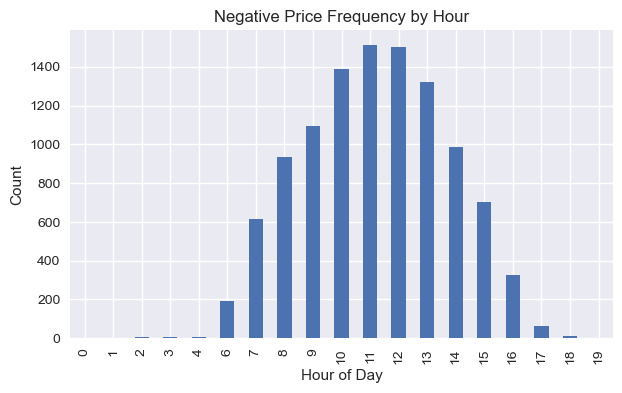

In [32]:
# ---------------------------------------
# Negative price frequency by hour
# ---------------------------------------

neg_hour = negative_df.groupby("hour")["RRP"].count()

plt.figure(figsize=(7,4))
neg_hour.plot(kind="bar")
plt.title("Negative Price Frequency by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Count")
plt.grid(True)
plt.show()


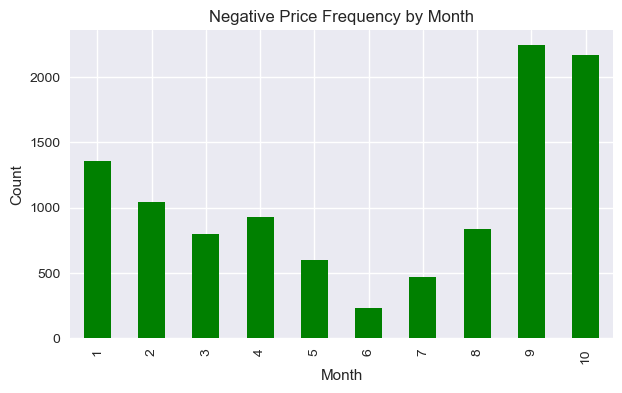

In [34]:
# ---------------------------------------
# Negative price frequency by month
# ---------------------------------------

neg_month = negative_df.groupby("month")["RRP"].count()

plt.figure(figsize=(7,4))
neg_month.plot(kind="bar", color="green")
plt.title("Negative Price Frequency by Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.grid(True)
plt.show()


🔍 Interpretation — Negative Spot Price Occurrence (Hourly & Monthly Patterns)

1. Key Insight  
Negative spot prices in NSW are not random events; they are highly concentrated during specific **midday hours** and **particular months**, indicating a strong structural link to renewable generation patterns rather than demand-driven scarcity.

2. Statistical Observations  
- **Hourly dimension**:
  - Negative prices are most frequent between **08:00 and 14:00**, peaking around **11:00–12:00**.
  - Very few negative prices occur overnight or during evening peak hours.
- **Monthly dimension**:
  - Highest negative price counts are observed in **September and October**, followed by **January and February**.
  - The lowest occurrence appears in **June**, aligning with winter conditions.

3. Patterns Identified  
- The midday clustering aligns closely with **solar generation peaks**, when supply often exceeds demand.
- Spring months (Sep–Oct) show elevated negative pricing due to a combination of:
  - High solar output
  - Moderate demand
  - Limited storage or export capacity
- Winter months exhibit fewer negative prices, reflecting lower solar availability and tighter supply-demand balance.

4. Impact on Forecasting / Market Behaviour  
- Spot price distributions are **asymmetric**, with a clear downside risk during daylight hours.
- Price forecasting models must explicitly capture:
  - Hour-of-day effects
  - Month/seasonality effects
  - Renewable-driven oversupply regimes
- Ignoring these patterns can lead to systematic underestimation of negative price probability.

5. What to Explore Next  
- Link negative price intervals to **net demand after PV** and **utility-scale solar output**.
- Quantify how often negative prices coincide with **high renewable ramp-down events**.
- Segment negative price behaviour by **weekday vs weekend** to assess demand elasticity effects.


### 2.1.8 Extreme Price Events (Spike Analysis)

In [35]:
# ---------------------------------------
# Extreme price spikes
# ---------------------------------------

spike_df = df_final[df_final["RRP"] > 1000]

print("Extreme price events (> $1000):", len(spike_df))
display(spike_df[["timestamp","RRP"]].head())


Extreme price events (> $1000): 232


,timestamp,RRP
265,2025-01-01 22:10:00,1509.99663
3960,2025-01-14 18:05:00,1051.71016
4199,2025-01-15 14:00:00,17500.00000
4200,2025-01-15 14:05:00,17500.00000
4201,2025-01-15 14:10:00,17500.00000


### 2.1.9 Hourly Distribution of Price (Risk Windows)

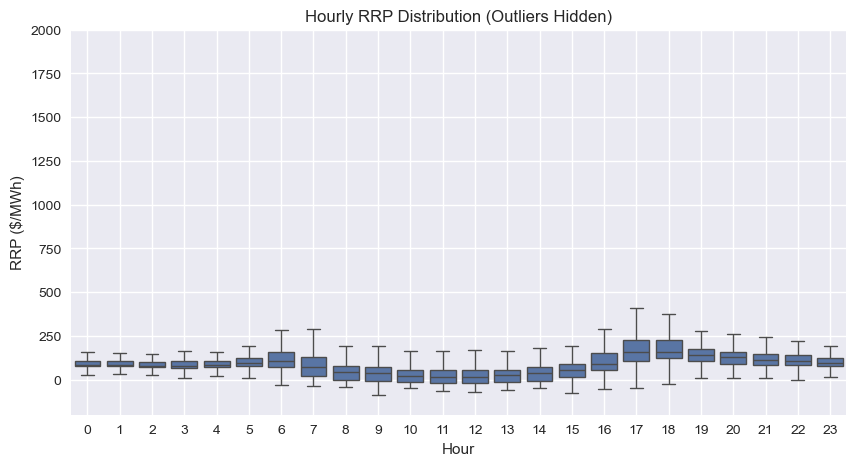

In [36]:
# ---------------------------------------
# Hourly price distribution
# ---------------------------------------

plt.figure(figsize=(10,5))
sns.boxplot(x="hour", y="RRP", data=df_final, showfliers=False)
plt.ylim(-200, 2000)
plt.title("Hourly RRP Distribution (Outliers Hidden)")
plt.xlabel("Hour")
plt.ylabel("RRP ($/MWh)")
plt.grid(True)
plt.show()


🔍 Interpretation — Hourly Spot Price Distribution (Outliers Hidden)

1. Key Insight  
When extreme price spikes are removed, NSW spot prices still exhibit a **strong intraday structure**, with systematically **lower prices during daylight hours** and **higher prices during the evening peak**, reflecting underlying demand–supply dynamics rather than rare shock events.

2. Statistical Observations  
- **Early morning (00:00–05:00)**:
  - Prices are relatively stable with moderate medians and low dispersion.
- **Daytime (08:00–14:00)**:
  - Median RRP is lowest, often close to zero or modestly positive.
  - Interquartile ranges are tight, indicating consistent price suppression.
- **Evening peak (16:00–19:00)**:
  - Highest median prices of the day.
  - Widest interquartile ranges, even after hiding outliers.
- **Late evening (20:00–23:00)**:
  - Prices gradually decline but remain elevated compared to midday.

3. Patterns Identified  
- A clear **solar-driven price trough** occurs during late morning to early afternoon.
- Price dispersion increases sharply during the **evening ramp**, when demand rises and solar generation falls.
- Even without extreme spikes, volatility is structurally higher during peak demand hours.

4. Impact on Forecasting / Market Behaviour  
- Hour-of-day is a **critical explanatory variable** for spot price forecasting.
- Models that treat prices as stationary across the day will systematically:
  - Overestimate daytime prices
  - Underestimate evening peak risk
- Retail and hedging strategies should differentiate **solar hours vs ramp hours**, not just daily averages.

5. What to Explore Next  
- Compare this hourly price structure with **net demand after PV**.
- Overlay **renewable ramp-down periods** to quantify their impact on evening price dispersion.
- Segment the same analysis by **season** to capture changing intraday risk profiles.


## Save Key Tables for Report / Power BI

In [38]:
# ---------------------------------------
# Save price behaviour summaries
# ---------------------------------------

price_summary = df_final.groupby("hour")["RRP"].agg(
    mean_price="mean",
    median_price="median",
    max_price="max",
    min_price="min",
    std_price="std"
).reset_index()

price_summary.to_csv("data/processed//price_hourly_summary.csv", index=False)

print("Saved → outputs/price_hourly_summary.csv")


Saved → outputs/price_hourly_summary.csv


## PHASE 2.2 — Demand vs Price EDA”

Objective:
- Understand how electricity demand and net demand influence NSW spot prices,
- Identify nonlinearities, thresholds, and risk zones relevant for price forecasting.


### 2.2.1 Price vs Total Demand (Baseline Relationship)

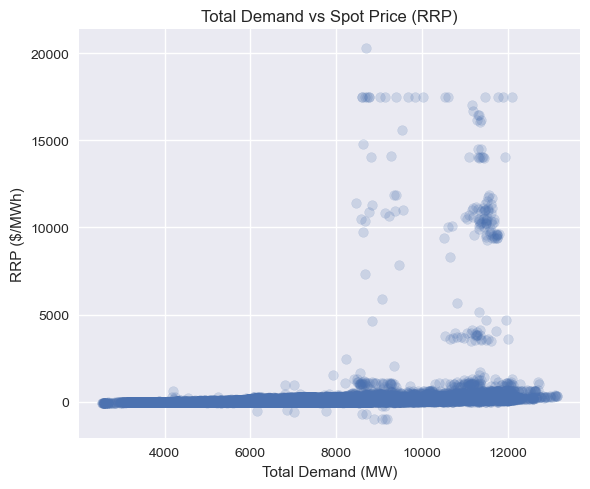

In [42]:
plt.figure(figsize=(6,5))
plt.scatter(df_final["TOTALDEMAND"], df_final["RRP"], alpha=0.2)
plt.xlabel("Total Demand (MW)")
plt.ylabel("RRP ($/MWh)")
plt.title("Total Demand vs Spot Price (RRP)")
plt.grid(True)
plt.tight_layout()
plt.show()


🔍 Interpretation — Total Demand vs Spot Price (RRP)

1. Key Insight  
Higher total demand is associated with a greater likelihood of extreme spot price spikes, but high demand alone does not consistently lead to high prices.

2. Statistical Observations  
- Most observations cluster at relatively low RRP levels across a wide demand range.  
- Extreme price spikes (very high RRP) occur only at higher demand levels, roughly in the upper demand range.  
- The relationship is highly non-linear and dispersed, indicating weak linear correlation.

3. Patterns Identified  
- A “price spike zone” emerges at high demand levels, where price variability increases sharply.  
- At moderate demand, prices remain relatively stable with occasional negative prices.  
- Demand explains the *upper tail risk* of prices rather than average price behaviour.

4. Impact on Forecasting / Market Behaviour  
- Total demand alone is insufficient for accurate price forecasting.  
- Demand is better treated as a *risk amplifier* rather than a direct price driver.  
- Models must account for additional factors (net demand, renewables, outages, time-of-day) to capture spikes.

5. What to Explore Next  
- Replace total demand with net demand after PV to capture scarcity more accurately.  
- Segment the analysis by hour and season to identify conditional demand–price effects.  
- Examine interaction effects between demand and renewable generation.


### 2.2.2 Price vs Net Demand After PV 

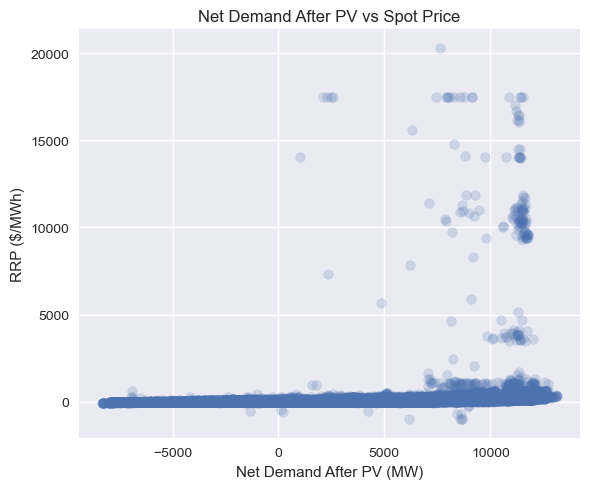

In [43]:
plt.figure(figsize=(6,5))
plt.scatter(df_final["net_demand_after_pv"], df_final["RRP"], alpha=0.2)
plt.xlabel("Net Demand After PV (MW)")
plt.ylabel("RRP ($/MWh)")
plt.title("Net Demand After PV vs Spot Price")
plt.grid(True)
plt.tight_layout()
plt.show()


🔍 Interpretation — Net Demand After PV vs Spot Price (RRP)

1. Key Insight  
Net demand after PV shows a much clearer and stronger relationship with extreme spot price spikes compared to total demand, making it a critical driver of price risk.

2. Statistical Observations  
- Most observations cluster at low RRP values across a wide range of net demand.  
- Extreme price spikes are concentrated at **high positive net demand levels**, particularly when net demand exceeds typical operating ranges.  
- Negative or low net demand (high PV contribution) is associated with very low or negative prices.

3. Patterns Identified  
- A distinct **scarcity regime** appears when net demand is high, where price volatility and spike frequency increase sharply.  
- During periods of negative net demand, prices are compressed near zero or negative due to oversupply.  
- The relationship is highly non-linear, with net demand acting as a threshold-based trigger rather than a linear driver.

4. Impact on Forecasting / Market Behaviour  
- Net demand after PV is a superior explanatory variable for spot price formation compared to raw total demand.  
- Price spikes are more predictable when framed around net demand stress rather than absolute demand.  
- Incorporating net demand significantly improves the ability to capture extreme price behaviour.

5. What to Explore Next  
- Segment net demand vs price by hour and season to isolate high-risk operating windows.  
- Combine net demand with renewable ramp rates to detect sudden scarcity events.  
- Use net demand as a primary feature in price spike classification and forecasting models.


### 2.2.3 Log-Scale Price vs Net Demand (Spike Visibility)

/Users/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


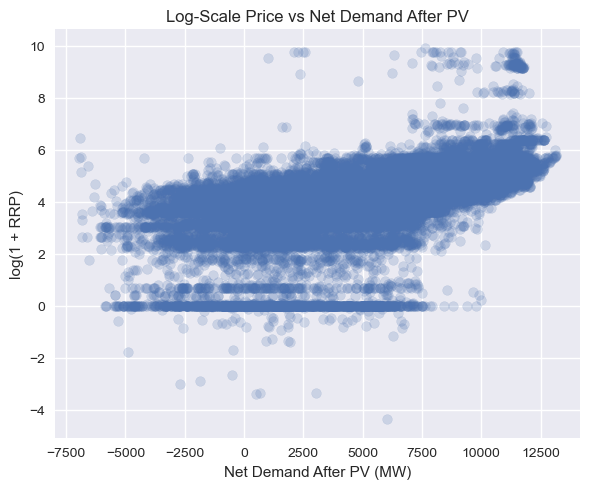

In [44]:
plt.figure(figsize=(6,5))
plt.scatter(
    df_final["net_demand_after_pv"],
    np.log1p(df_final["RRP"]),
    alpha=0.2
)
plt.xlabel("Net Demand After PV (MW)")
plt.ylabel("log(1 + RRP)")
plt.title("Log-Scale Price vs Net Demand After PV")
plt.grid(True)
plt.tight_layout()
plt.show()


🔍 Interpretation — Log-Scale Price vs Net Demand After PV

1. Key Insight  
When viewed on a log scale, spot prices exhibit a clearer, monotonic relationship with net demand after PV, highlighting net demand as a primary stress indicator for extreme pricing events.

2. Statistical Observations  
- The bulk of observations form a dense band where `log(1 + RRP)` increases gradually with rising net demand.  
- Extreme price events (high log values) are concentrated at **high positive net demand levels**, while low or negative net demand aligns with compressed price ranges.  
- The log transformation reduces skewness and reveals structure that is obscured in linear-scale price plots.

3. Patterns Identified  
- A **threshold effect** is visible: beyond a certain net demand level, price dispersion increases sharply.  
- Negative and low net demand regions show limited price variability, consistent with oversupply conditions driven by PV.  
- High net demand regions show widening variance, indicating multiple market regimes under scarcity.

4. Impact on Forecasting / Market Behaviour  
- Log-transformed prices are more suitable for statistical modelling and machine learning due to reduced heteroskedasticity.  
- Net demand after PV provides a stable explanatory signal across both normal and extreme pricing regimes.  
- This relationship supports the use of net demand as a core feature for spike probability and tail-risk forecasting.

5. What to Explore Next  
- Identify net demand thresholds where price volatility accelerates.  
- Segment the relationship by hour-of-day and season to refine regime boundaries.  
- Incorporate lagged net demand and ramp variables to improve spike anticipation models.


### 2.2.4 Binned Net Demand vs Average Price (Threshold Detection)

/var/folders/m8/cwx1pw8d7qs9k5mbrk0vzxz80000gn/T/ipykernel_4219/32613054.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("net_demand_bin")["RRP"]


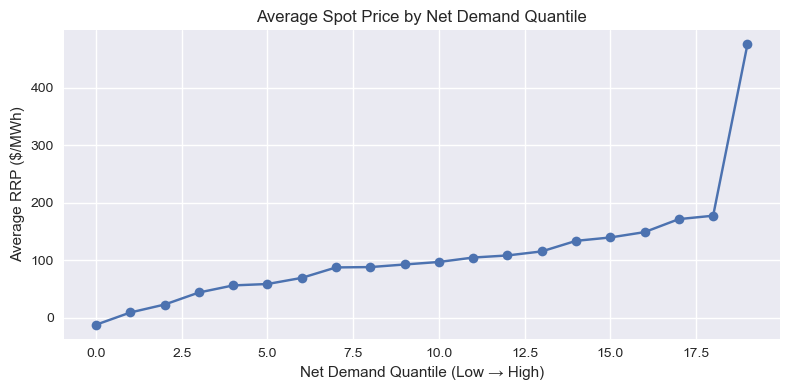

In [45]:
# Create demand bins
df_final["net_demand_bin"] = pd.qcut(
    df_final["net_demand_after_pv"], q=20, duplicates="drop"
)

# Aggregate price by bin
bin_price = (
    df_final
    .groupby("net_demand_bin")["RRP"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(8,4))
plt.plot(range(len(bin_price)), bin_price["RRP"], marker="o")
plt.xlabel("Net Demand Quantile (Low → High)")
plt.ylabel("Average RRP ($/MWh)")
plt.title("Average Spot Price by Net Demand Quantile")
plt.grid(True)
plt.tight_layout()
plt.show()


🔍 Interpretation — Average Spot Price by Net Demand Quantile

1. Key Insight  
Average spot prices increase monotonically with higher net demand quantiles, with a sharp escalation in the highest quantile, confirming net demand as a dominant driver of price stress.

2. Statistical Observations  
- Lower net demand quantiles are associated with very low average prices, including negative pricing in the lowest bucket.  
- Middle quantiles show a gradual and relatively stable increase in average RRP, indicating normal operating conditions.  
- The highest net demand quantile exhibits a **disproportionate jump** in average price, far exceeding the linear trend observed in earlier quantiles.

3. Patterns Identified  
- A **non-linear relationship** exists between net demand and price: prices rise slowly across most quantiles and then surge at the upper tail.  
- This suggests a market regime shift when net demand approaches system constraints.  
- The curve shape reflects scarcity pricing rather than smooth marginal cost pricing.

4. Impact on Forecasting / Market Behaviour  
- Net demand quantiles are a powerful way to capture price risk non-linearity in forecasting models.  
- Extreme price events are concentrated in the top net demand buckets, making these quantiles critical for spike classification.  
- This supports quantile-based features or regime-switching models for spot price forecasting.

5. What to Explore Next  
- Identify the absolute net demand thresholds corresponding to the highest quantiles.  
- Combine net demand quantiles with ramp rates and renewable output to improve spike probability estimation.  
- Compare quantile-price behaviour across seasons to assess seasonal risk amplification.


### 2.2.5 Demand vs Price by Hour

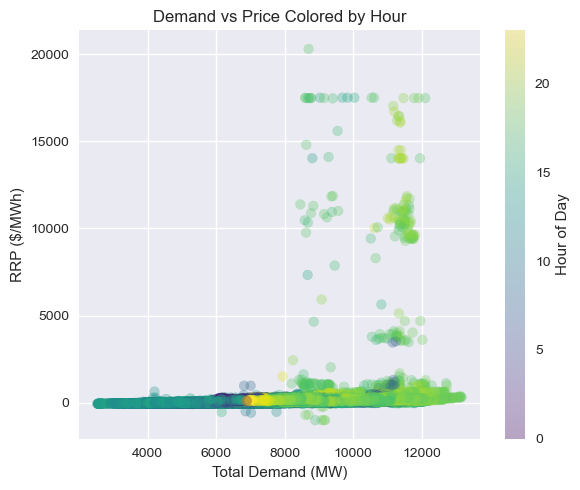

In [46]:
plt.figure(figsize=(6,5))
plt.scatter(
    df_final["TOTALDEMAND"],
    df_final["RRP"],
    c=df_final["hour"],
    cmap="viridis",
    alpha=0.3
)
plt.colorbar(label="Hour of Day")
plt.xlabel("Total Demand (MW)")
plt.ylabel("RRP ($/MWh)")
plt.title("Demand vs Price Colored by Hour")
plt.grid(True)
plt.tight_layout()
plt.show()


🔍 Interpretation — Demand vs Price Coloured by Hour of Day

1. Key Insight  
Extreme price outcomes are not driven by demand alone; they are strongly concentrated in specific **hours of the day**, particularly during late afternoon and evening periods when the system is most stressed.

2. Statistical Observations  
- Low to moderate demand levels (≈3,000–7,000 MW) consistently correspond to low prices across most hours.  
- At higher demand levels (≈9,000–12,500 MW), price dispersion increases sharply.  
- High-price outliers (>$5,000/MWh and spikes above $10,000/MWh) are predominantly associated with **later hours**, as indicated by the colour gradient.

3. Patterns Identified  
- A clear **time-of-day conditioning effect** exists: similar demand levels produce very different prices depending on the hour.  
- Midday hours tend to cluster at lower prices even at moderate demand, likely due to higher solar availability.  
- Evening hours show both higher average prices and greater volatility at comparable demand levels, reflecting reduced renewable supply and higher net demand.

4. Impact on Forecasting / Market Behaviour  
- Hour-of-day is a critical interaction feature with demand for spot price forecasting.  
- Models that treat demand-price relationships as static (ignoring time-of-day) will systematically underpredict evening price risk.  
- This reinforces the need for interaction terms or time-based segmentation in price models.

5. What to Explore Next  
- Repeat this analysis using **net demand after PV** to isolate the solar effect more clearly.  
- Quantify price sensitivity by hour using separate regression slopes or quantile analysis.  
- Identify specific “risk hours” where high demand most frequently translates into price spikes.


### 2.2.6 Negative Price Region vs Demand

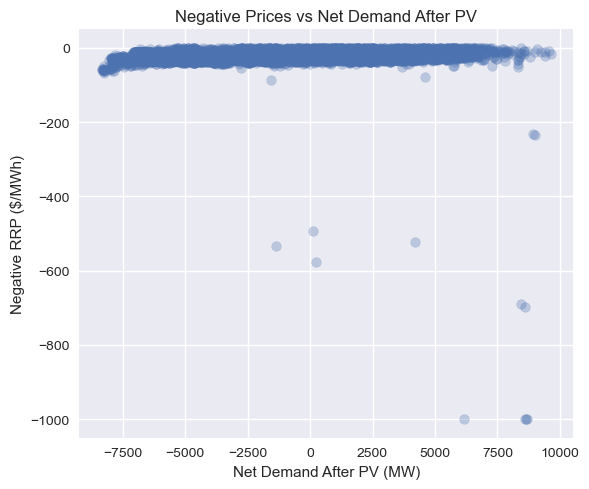

In [47]:
neg_prices = df_final[df_final["RRP"] < 0]

plt.figure(figsize=(6,5))
plt.scatter(
    neg_prices["net_demand_after_pv"],
    neg_prices["RRP"],
    alpha=0.3
)
plt.xlabel("Net Demand After PV (MW)")
plt.ylabel("Negative RRP ($/MWh)")
plt.title("Negative Prices vs Net Demand After PV")
plt.grid(True)
plt.tight_layout()
plt.show()


#### 🔍 Interpretation — Demand vs Price Coloured by Hour of Day
### 1. Key Insight

Spot price behaviour is not driven by demand alone. Time-of-day plays a decisive role, with extreme price outcomes concentrated in specific hours—particularly late afternoon and evening—when system flexibility is lowest.

### 2. Statistical Observations

- Low to moderate demand levels (≈3,000–7,000 MW) are consistently associated with low and stable prices across most hours.

- At higher demand levels (≈9,000–12,500 MW), price dispersion increases sharply, indicating higher uncertainty and risk.

- High-price outliers (>$5,000/MWh and spikes exceeding $10,000/MWh) are strongly clustered in later hours, as indicated by the colour gradient.

### 3. Patterns Identified

A clear time-of-day conditioning effect exists: similar demand levels result in very different prices depending on the hour.

- Midday hours tend to cluster around lower prices even at moderate demand, likely due to stronger solar generation reducing net demand.

- Evening hours exhibit both higher average prices and greater volatility, reflecting declining renewable output and increased reliance on dispatchable generation.

### 4. Impact on Forecasting / Market Behaviour

Hour-of-day is a critical interaction feature with demand for spot price forecasting.

- Models that assume a static demand–price relationship will systematically underpredict evening price risk.

- Time-based segmentation or interaction terms are essential for capturing price volatility accurately.

### 5. What to Explore Next

- Repeat this analysis using net demand after PV to isolate the solar effect more clearly.

- Quantify price sensitivity by hour using hour-specific regressions or quantile analysis.

Identify specific “risk hours” where high demand most frequently translates into price spikes.

## `PHASE 2.3 — Renewables Impact on Spot Prices

This section examines how renewable generation — particularly rooftop solar PV and other intermittent sources — reshapes net demand and influences spot price behaviour in the NSW electricity market.

The focus is on understanding structural price drivers, not just correlations, to support robust spot price forecasting.

###  2.3.1 Rooftop PV Impact

Rooftop solar PV reduces operational demand during daylight hours and alters the intraday demand shape. This effect is especially important in NSW, where rooftop PV penetration is high and growing.

#### Objectives

- Quantify how rooftop PV reduces gross demand

- Identify hours with maximum PV impact

- Link PV-driven demand suppression to price outcomes, including negative prices

#### Key Questions

- When does rooftop PV have the strongest impact on net demand?

- How does PV affect midday prices compared to evening prices?

- Is PV penetration linked to negative price events?

### 2.3.1.1 Rooftop PV Time Series (Overall Behaviour)

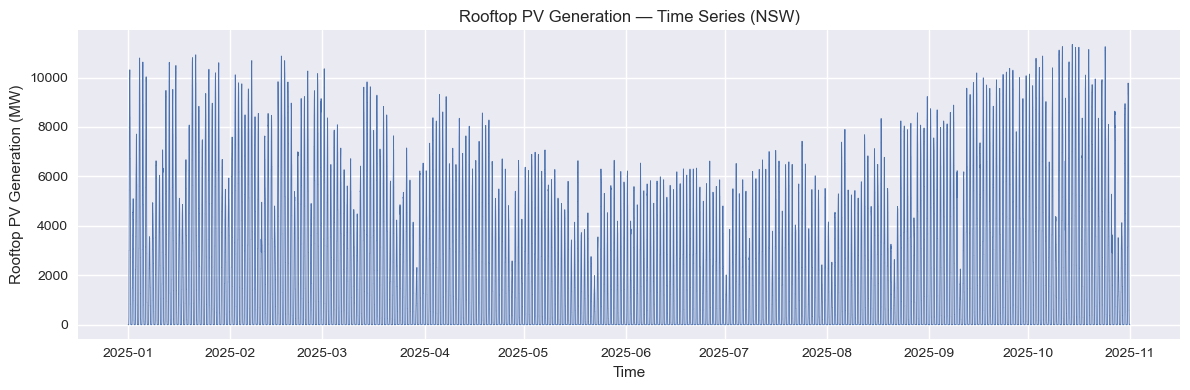

In [48]:
plt.figure(figsize=(12,4))
plt.plot(df_final["timestamp"], df_final["pv_rooftop_mw"], linewidth=0.6)
plt.title("Rooftop PV Generation — Time Series (NSW)")
plt.xlabel("Time")
plt.ylabel("Rooftop PV Generation (MW)")
plt.grid(True)
plt.tight_layout()
plt.show()


### 2.3.1.2 Average Rooftop PV Profile by Hour (Duck Curve Effect)

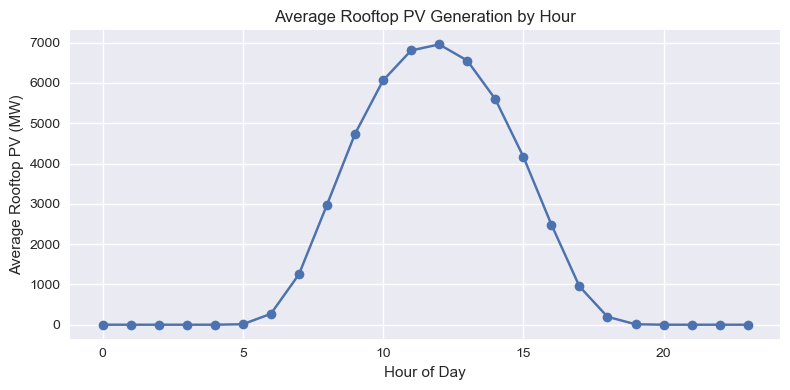

In [49]:
pv_hourly = (
    df_final
    .groupby("hour")["pv_rooftop_mw"]
    .mean()
)

plt.figure(figsize=(8,4))
plt.plot(pv_hourly.index, pv_hourly.values, marker="o")
plt.title("Average Rooftop PV Generation by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Average Rooftop PV (MW)")
plt.grid(True)
plt.tight_layout()
plt.show()


### 2.3.1.3 Rooftop PV Distribution (Magnitude & Variability)

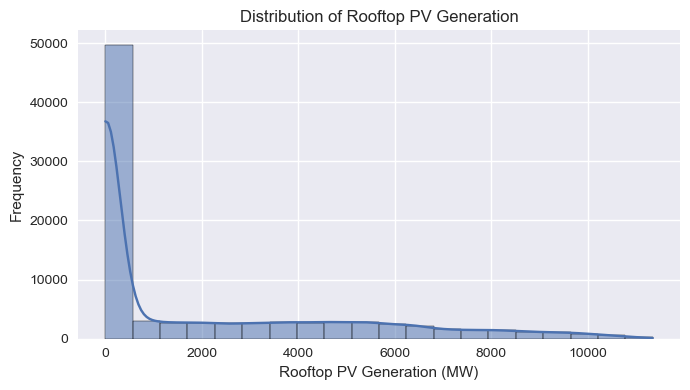

In [53]:
plt.figure(figsize=(7,4))
sns.histplot(df_final["pv_rooftop_mw"], bins=20, kde=True)
plt.title("Distribution of Rooftop PV Generation")
plt.xlabel("Rooftop PV Generation (MW)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


### 2.3.1.4 Rooftop PV vs Hour (Spread & Consistency)

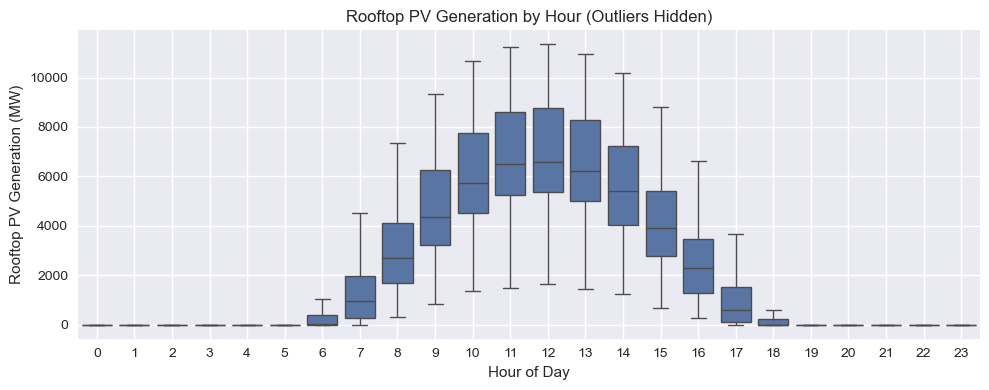

In [54]:
plt.figure(figsize=(10,4))
sns.boxplot(x="hour", y="pv_rooftop_mw", data=df_final, showfliers=False)
plt.title("Rooftop PV Generation by Hour (Outliers Hidden)")
plt.xlabel("Hour of Day")
plt.ylabel("Rooftop PV Generation (MW)")
plt.grid(True)
plt.tight_layout()
plt.show()


### 2.3.2 Intermittent Generation Impact

Intermittent generation (utility-scale solar and wind) introduces variability into the electricity system due to its dependence on weather conditions. This section analyses the behaviour, variability, and ramping characteristics of intermittent generation and its potential influence on spot price volatility

### 2.3.2.1 Intermittent Generation Time Series

- Purpose:
Understand overall magnitude, seasonality, and volatility of intermittent generation.

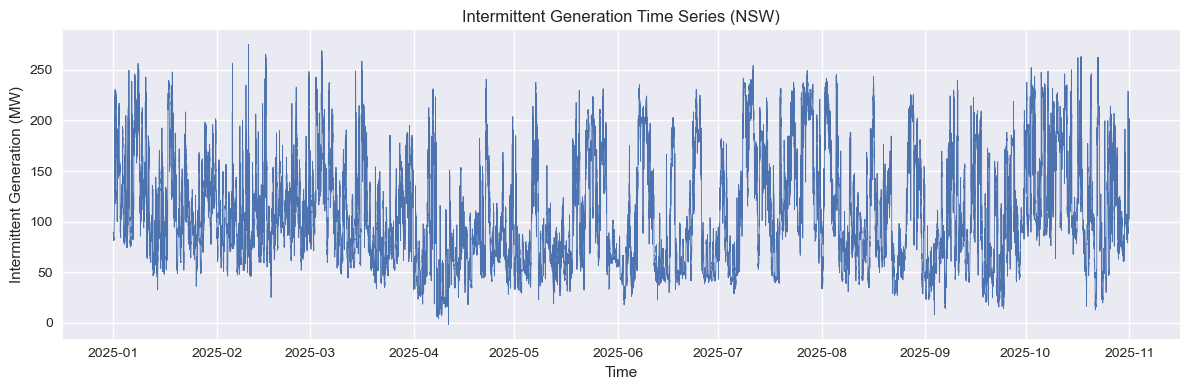

In [55]:
plt.figure(figsize=(12,4))
plt.plot(df_final["timestamp"], df_final["TOTALINTERMITTENTGENERATION"], linewidth=0.6)
plt.title("Intermittent Generation Time Series (NSW)")
plt.xlabel("Time")
plt.ylabel("Intermittent Generation (MW)")
plt.grid(True)
plt.tight_layout()
plt.show()


### 2.3.2.2 Average Intermittent Generation Profile by Hour

- Purpose:

Identify typical intraday patterns and peak renewable contribution hours.

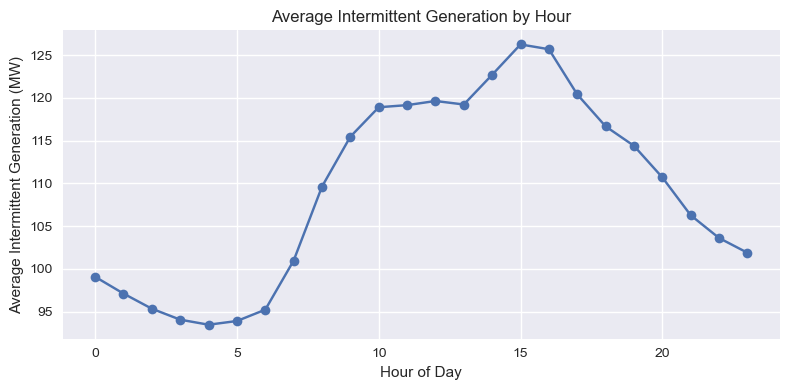

In [56]:
intermittent_hourly = (
    df_final
    .groupby("hour")["TOTALINTERMITTENTGENERATION"]
    .mean()
)

plt.figure(figsize=(8,4))
plt.plot(intermittent_hourly.index, intermittent_hourly.values, marker="o")
plt.title("Average Intermittent Generation by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Average Intermittent Generation (MW)")
plt.grid(True)
plt.tight_layout()
plt.show()


### 2.3.2.3 Distribution of Intermittent Generation

- Purpose:
Assess how often intermittent generation operates at low, medium, and high output levels.

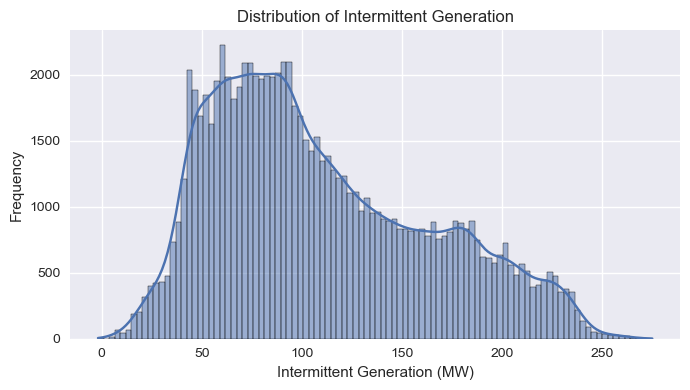

In [57]:
plt.figure(figsize=(7,4))
sns.histplot(df_final["TOTALINTERMITTENTGENERATION"], bins=100, kde=True)
plt.title("Distribution of Intermittent Generation")
plt.xlabel("Intermittent Generation (MW)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


### 2.3.2.4 Intermittent Generation by Hour (Variability)
- Purpose:
Examine variability and consistency of intermittent generation across different hours.

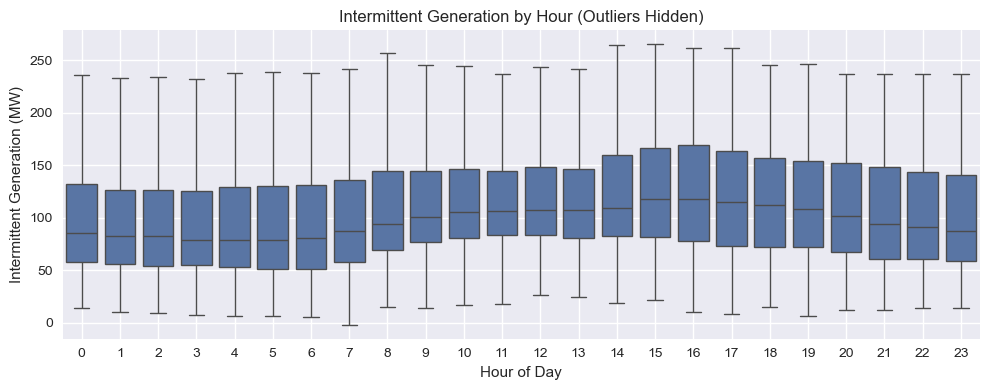

In [58]:
plt.figure(figsize=(10,4))
sns.boxplot(
    x="hour",
    y="TOTALINTERMITTENTGENERATION",
    data=df_final,
    showfliers=False
)
plt.title("Intermittent Generation by Hour (Outliers Hidden)")
plt.xlabel("Hour of Day")
plt.ylabel("Intermittent Generation (MW)")
plt.grid(True)
plt.tight_layout()
plt.show()


### 2.3.3 Net Demand Shaping

Net demand represents the residual load that must be met by dispatchable generation after accounting for rooftop PV and other intermittent renewable sources. This section examines how net demand reshapes daily load profiles, introduces new system stress periods, and forms the strongest structural link to spot price formation.

### 2.3.3.1 Total Demand vs Net Demand (Time Series Comparison)

Purpose:
Visually demonstrate how rooftop PV and renewables suppress and reshape gross demand.

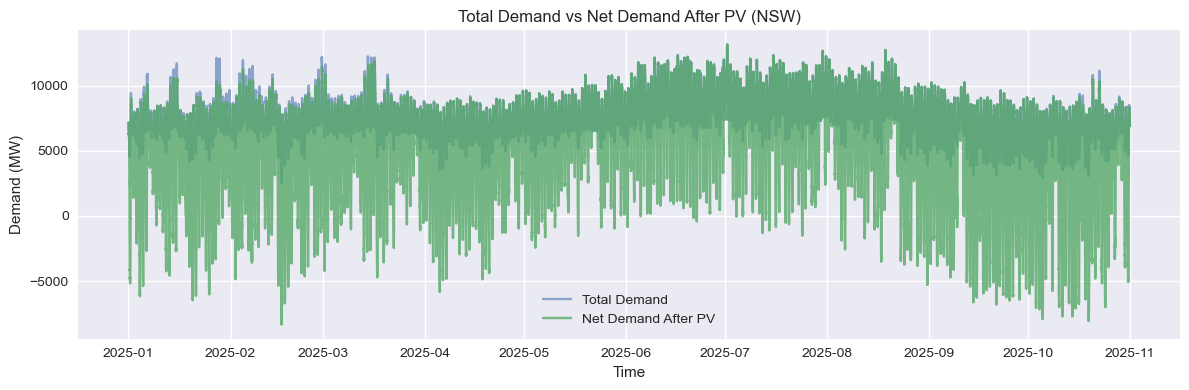

In [61]:
plt.figure(figsize=(12,4))
plt.plot(df_final["timestamp"], df_final["TOTALDEMAND"], label="Total Demand", alpha=0.6)
plt.plot(df_final["timestamp"], df_final["net_demand_after_pv"], label="Net Demand After PV", alpha=0.8)
plt.title("Total Demand vs Net Demand After PV (NSW)")
plt.xlabel("Time")
plt.ylabel("Demand (MW)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 2.3.3.2 Average Daily Demand Curve vs Net Demand Curve

- Purpose:
Identify how PV reshapes the average intraday load curve (duck curve effect).

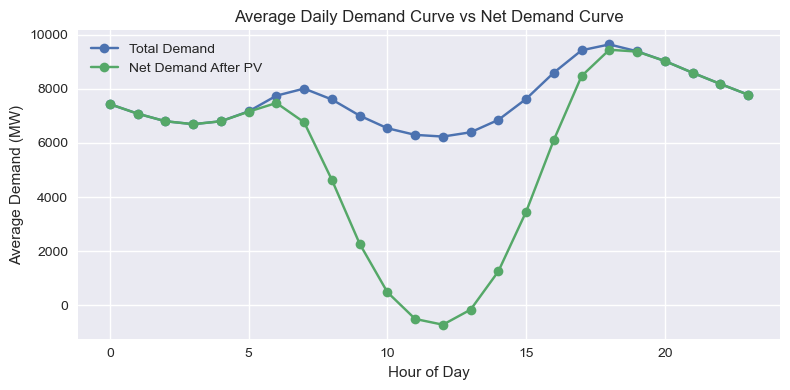

In [62]:
avg_total_demand = df_final.groupby("hour")["TOTALDEMAND"].mean()
avg_net_demand = df_final.groupby("hour")["net_demand_after_pv"].mean()

plt.figure(figsize=(8,4))
plt.plot(avg_total_demand.index, avg_total_demand.values, marker="o", label="Total Demand")
plt.plot(avg_net_demand.index, avg_net_demand.values, marker="o", label="Net Demand After PV")
plt.title("Average Daily Demand Curve vs Net Demand Curve")
plt.xlabel("Hour of Day")
plt.ylabel("Average Demand (MW)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 2.3.3.3 Net Demand Distribution

Purpose:
Understand the range, skewness, and frequency of low or negative net demand conditions.

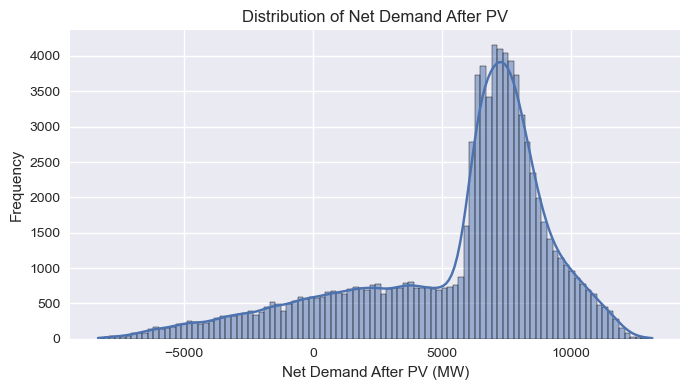

In [63]:
plt.figure(figsize=(7,4))
sns.histplot(df_final["net_demand_after_pv"], bins=100, kde=True)
plt.title("Distribution of Net Demand After PV")
plt.xlabel("Net Demand After PV (MW)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


### 2.3.3.4 Net Demand by Hour (Variability & Risk Windows)

Purpose:
Identify hours with the lowest net demand and the highest variability, which are critical for price formation.

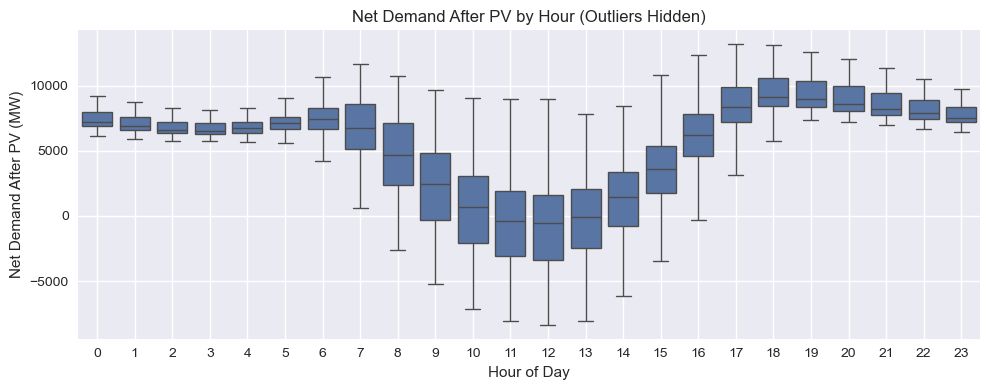

In [64]:
plt.figure(figsize=(10,4))
sns.boxplot(
    x="hour",
    y="net_demand_after_pv",
    data=df_final,
    showfliers=False
)
plt.title("Net Demand After PV by Hour (Outliers Hidden)")
plt.xlabel("Hour of Day")
plt.ylabel("Net Demand After PV (MW)")
plt.grid(True)
plt.tight_layout()
plt.show()


## PHASE 2.4 — Weather Impact



Weather conditions influence electricity demand (heating/cooling load) and renewable output (especially wind and solar). This section analyses how temperature and wind speed relate to demand, net demand, and spot price behaviour in NSW.

## 2.4.1 Temperature Time Series (Context)

Purpose: Confirm the seasonal pattern in temperature across the dataset period.

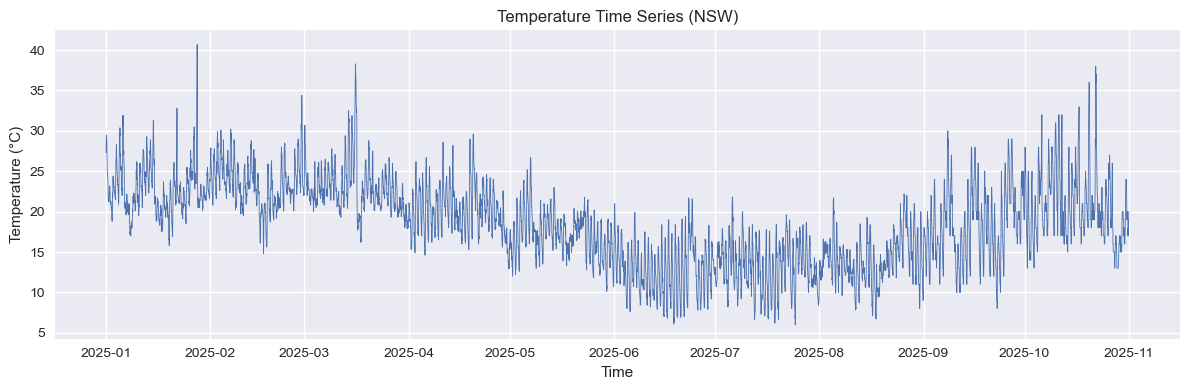

In [66]:
plt.figure(figsize=(12,4))
plt.plot(df_final["timestamp"], df_final["temperature"], linewidth=0.6)
plt.title("Temperature Time Series (NSW)")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.tight_layout()
plt.show()


## 2.4.2 Temperature Distribution

Purpose: Understand typical operating ranges and extreme conditions.

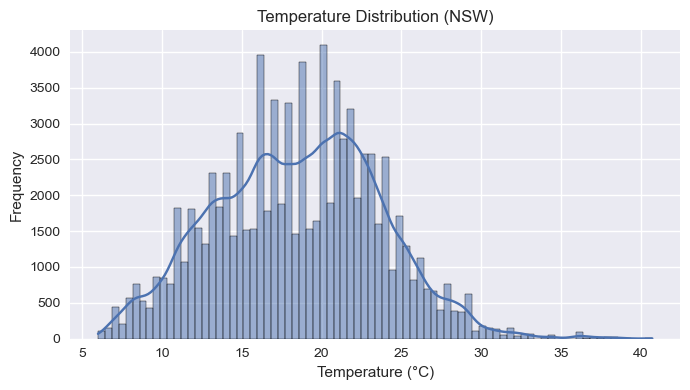

In [67]:
plt.figure(figsize=(7,4))
sns.histplot(df_final["temperature"], bins=80, kde=True)
plt.title("Temperature Distribution (NSW)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


## 2.4.3 Temperature vs Total Demand

Purpose: Test whether higher temperatures correspond to higher electricity demand (cooling load).

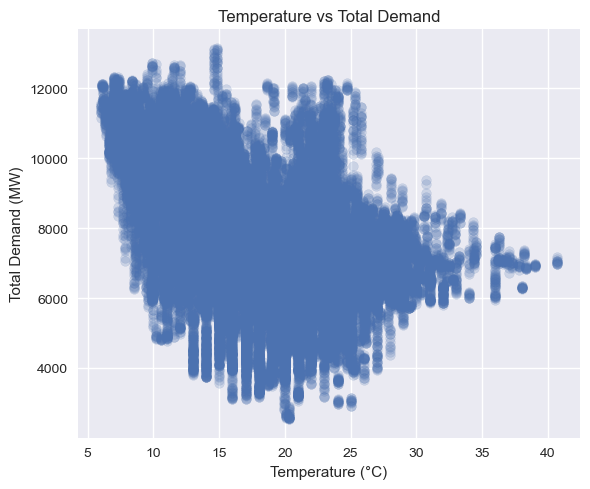

In [68]:
plt.figure(figsize=(6,5))
plt.scatter(df_final["temperature"], df_final["TOTALDEMAND"], alpha=0.2)
plt.title("Temperature vs Total Demand")
plt.xlabel("Temperature (°C)")
plt.ylabel("Total Demand (MW)")
plt.grid(True)
plt.tight_layout()
plt.show()


### 2.4.4 Temperature vs Net Demand After PV

Purpose: Observe whether PV suppression changes the temperature–demand relationship

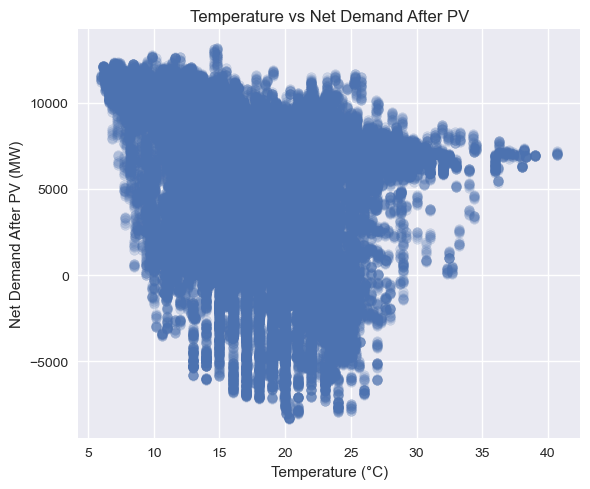

In [69]:
plt.figure(figsize=(6,5))
plt.scatter(df_final["temperature"], df_final["net_demand_after_pv"], alpha=0.2)
plt.title("Temperature vs Net Demand After PV")
plt.xlabel("Temperature (°C)")
plt.ylabel("Net Demand After PV (MW)")
plt.grid(True)
plt.tight_layout()
plt.show()


## 2.4.5 Temperature vs Spot Price (RRP)

Purpose: Check whether temperature extremes (hot days) align with higher price risk.

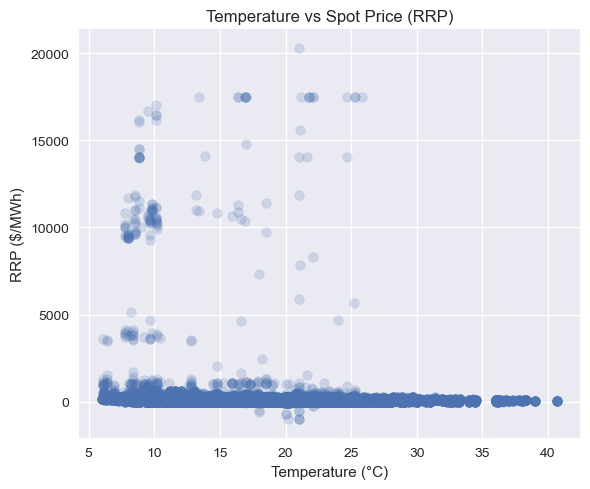

In [70]:
plt.figure(figsize=(6,5))
plt.scatter(df_final["temperature"], df_final["RRP"], alpha=0.2)
plt.title("Temperature vs Spot Price (RRP)")
plt.xlabel("Temperature (°C)")
plt.ylabel("RRP ($/MWh)")
plt.grid(True)
plt.tight_layout()
plt.show()


### 2.4.6 Wind Speed Time Series

Purpose: Understand wind availability patterns across time.

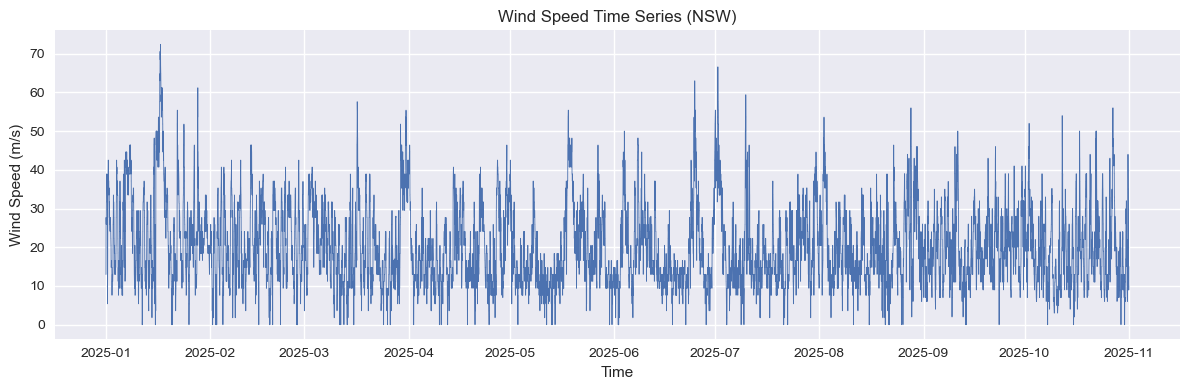

In [71]:
plt.figure(figsize=(12,4))
plt.plot(df_final["timestamp"], df_final["wind_speed"], linewidth=0.6)
plt.title("Wind Speed Time Series (NSW)")
plt.xlabel("Time")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
plt.tight_layout()
plt.show()


### 2.4.7 Wind Speed Distribution

Purpose: Understand typical wind conditions and variability.

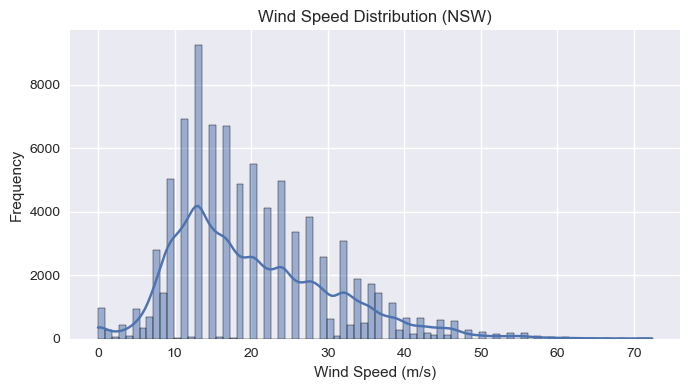

In [72]:
plt.figure(figsize=(7,4))
sns.histplot(df_final["wind_speed"], bins=80, kde=True)
plt.title("Wind Speed Distribution (NSW)")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


### 2.4.8 Wind Speed vs Intermittent Generation

Purpose: Test whether higher wind speeds align with higher intermittent generation output (proxy relationship).

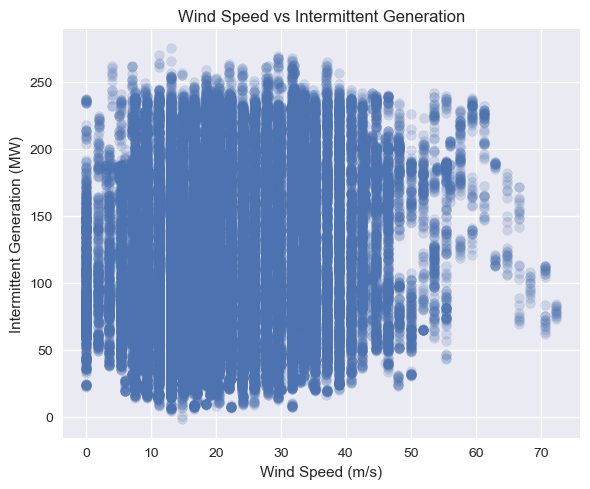

In [73]:
plt.figure(figsize=(6,5))
plt.scatter(df_final["wind_speed"], df_final["TOTALINTERMITTENTGENERATION"], alpha=0.2)
plt.title("Wind Speed vs Intermittent Generation")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Intermittent Generation (MW)")
plt.grid(True)
plt.tight_layout()
plt.show()


### 2.4.9 Weather vs Price (Log-Scale)

Purpose: Reveal any weather relationship with spikes by reducing skew.

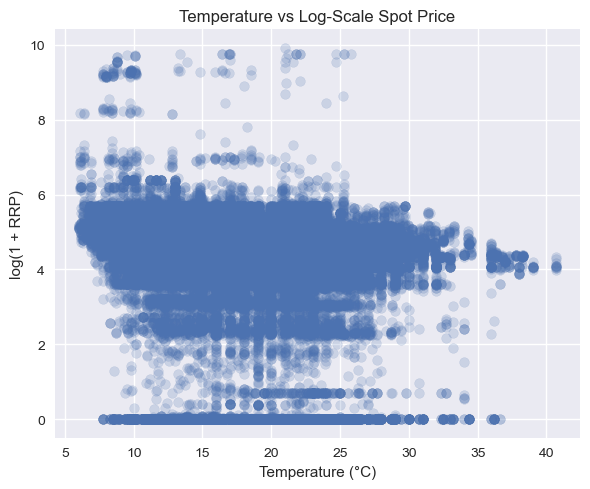

In [74]:
plt.figure(figsize=(6,5))
plt.scatter(df_final["temperature"], np.log1p(df_final["RRP"].clip(lower=0)), alpha=0.2)
plt.title("Temperature vs Log-Scale Spot Price")
plt.xlabel("Temperature (°C)")
plt.ylabel("log(1 + RRP)")
plt.grid(True)
plt.tight_layout()
plt.show()


## PHASE 2.5 — Ramp & Volatility Analysis

In [76]:
# Ensure correct time ordering before calculating ramps
df_final = df_final.sort_values("timestamp").reset_index(drop=True)
# Demand ramp (gross demand change)
df_final["total_demand_ramp"] = df_final["TOTALDEMAND"].diff()

# Net demand ramp (after PV)
df_final["net_demand_ramp"] = df_final["net_demand_after_pv"].diff()

# Renewable ramp (intermittent generation change)
df_final["renewable_ramp"] = df_final["TOTALINTERMITTENTGENERATION"].diff()

# Price ramp (optional but useful)
df_final["price_ramp"] = df_final["RRP"].diff()
# Drop first row with NaN ramps
df_final = df_final.dropna().reset_index(drop=True)


In [77]:
df_final[[
    "total_demand_ramp",
    "net_demand_ramp",
    "renewable_ramp",
    "price_ramp"
]].describe()

,total_demand_ramp,net_demand_ramp,renewable_ramp,price_ramp
count,87546.000000,87546.000000,87546.000000,87546.000000
mean,-0.003064,-0.003064,0.000577,-0.000148
std,77.083724,227.880218,5.621571,374.895201
min,-936.640000,-4883.210000,-119.534390,-19938.831670
25%,-49.390000,-53.877500,-1.744215,-5.226700
50%,-4.190000,-4.880000,-0.003725,0.000000
75%,46.620000,50.767500,1.683225,5.039053
max,540.110000,2754.980000,118.077080,19206.176370


In [78]:
df_final.columns

Index(['timestamp', 'RRP', 'TOTALDEMAND', 'net_demand_after_pv',
       'pv_rooftop_mw', 'TOTALINTERMITTENTGENERATION', 'temperature',
       'wind_speed', 'hour', 'dayofweek', 'month', 'net_demand_bin',
       'total_demand_ramp', 'net_demand_ramp', 'renewable_ramp', 'price_ramp'],
      dtype='object')

### PHASE 2.5.1 — Ramp Distributions

Ramp distributions help quantify how rapidly the power system changes over short time intervals. Large ramps often indicate operational stress and are closely linked to price volatility and extreme events.

This section analyses the distribution of:

- Total demand ramps

- Net demand ramps (after PV)

- Renewable generation ramps

### 2.5.1.1 Total Demand Ramp Distribution

Purpose:

Understand how quickly gross electricity demand changes between consecutive intervals.

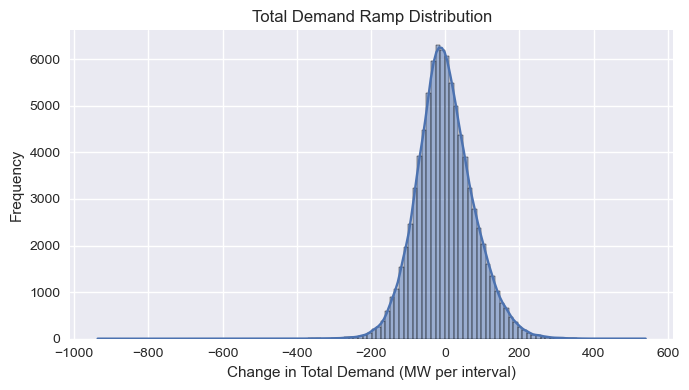

In [79]:
plt.figure(figsize=(7,4))
sns.histplot(df_final["total_demand_ramp"], bins=120, kde=True)
plt.title("Total Demand Ramp Distribution")
plt.xlabel("Change in Total Demand (MW per interval)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()



### 2.5.1.2 Net Demand Ramp Distribution

Purpose:
Assess volatility in demand after accounting for rooftop PV, which directly affects dispatchable generation requirements.

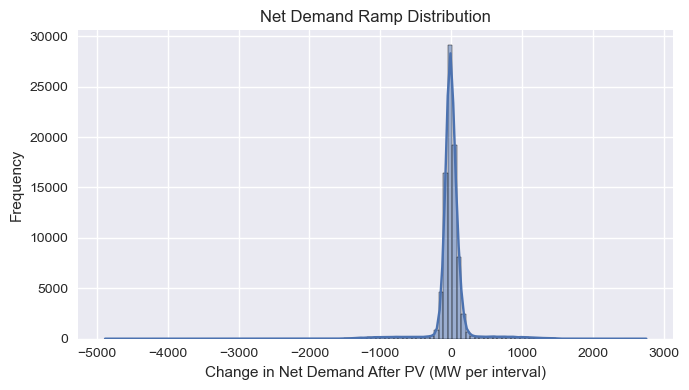

In [85]:
plt.figure(figsize=(7,4))
sns.histplot(df_final["net_demand_ramp"], bins=120, kde=True)
plt.title("Net Demand Ramp Distribution")
plt.xlabel("Change in Net Demand After PV (MW per interval)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()



### 2.5.1.3 Renewable Generation Ramp Distribution

Purpose:

Understand the variability and intermittency of renewable generation output.

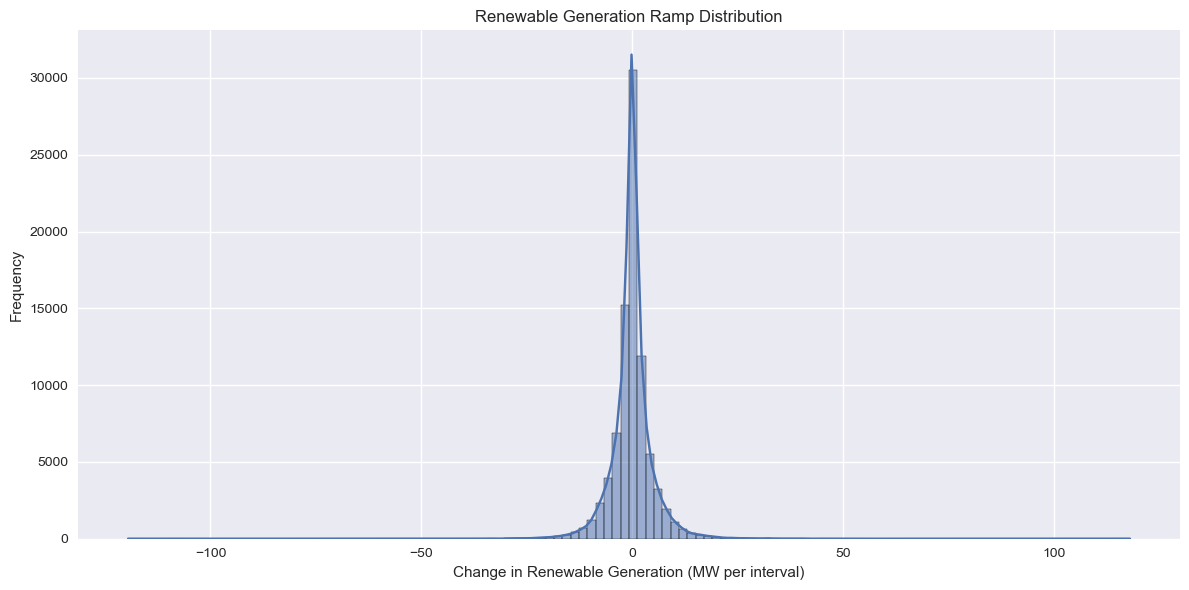

In [88]:
plt.figure(figsize=(12,6))
sns.histplot(df_final["renewable_ramp"], bins=120, kde=True)
plt.title("Renewable Generation Ramp Distribution")
plt.xlabel("Change in Renewable Generation (MW per interval)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()



## PHASE 2.5.2 — Ramp vs Price Volatility

This section examines whether rapid changes (ramps) in demand and renewable generation are associated with increased spot price volatility. The goal is to test whether ramp magnitude acts as a leading indicator of price risk.

### 2.5.2.1 Price Volatility Measure (Rolling Standard Deviation)

Purpose:
Create a short-term price volatility metric to compare against ramp magnitude.

In [90]:
# 24-hour rolling window (288 intervals for 5-min data)
df_final["price_volatility_24h"] = df_final["RRP"].rolling(288).std()

# Drop initial NaNs caused by rolling window
vol_df = df_final.dropna(subset=["price_volatility_24h"])


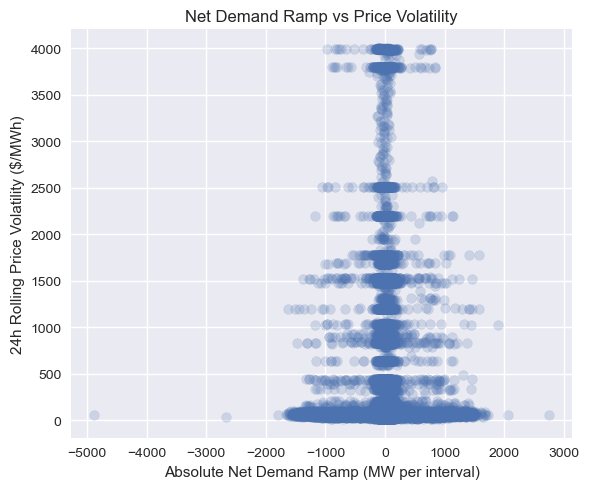

In [91]:
plt.figure(figsize=(6,5))
plt.scatter(
    vol_df["net_demand_ramp"],
    vol_df["price_volatility_24h"],
    alpha=0.2
)
plt.xlabel("Absolute Net Demand Ramp (MW per interval)")
plt.ylabel("24h Rolling Price Volatility ($/MWh)")
plt.title("Net Demand Ramp vs Price Volatility")
plt.grid(True)
plt.tight_layout()
plt.show()


### 2.5.2.3 Renewable Ramp vs Price Volatility

Purpose:
Assess whether renewable generation variability contributes to price volatility.

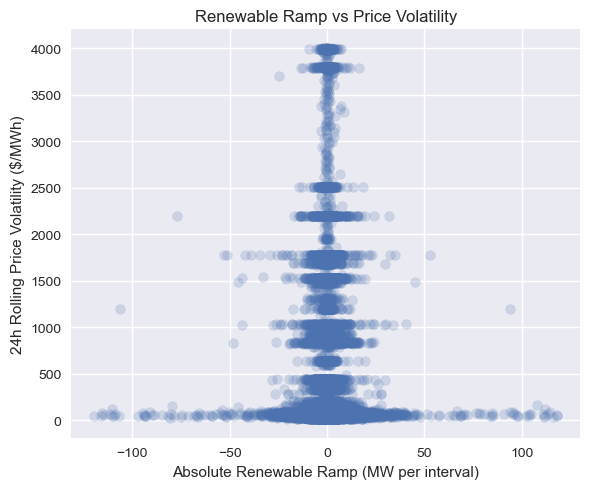

In [92]:
plt.figure(figsize=(6,5))
plt.scatter(
    vol_df["renewable_ramp"],
    vol_df["price_volatility_24h"],
    alpha=0.2
)
plt.xlabel("Absolute Renewable Ramp (MW per interval)")
plt.ylabel("24h Rolling Price Volatility ($/MWh)")
plt.title("Renewable Ramp vs Price Volatility")
plt.grid(True)
plt.tight_layout()
plt.show()


### EDA Summary 
Exploratory Data Analysis was conducted to understand spot price behaviour, demand dynamics, renewable impacts, and risk regimes. Key drivers were identified, and no further exploratory analysis was required

In [ ]:
df_final.to_csv("data/processed/final_spot_price_dataset.csv", index=False)